In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import root_mean_squared_error

from gbnet.models.forecasting import Forecast


urls = [
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_covid.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_multivariate.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_retail_sales.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers2.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_yosemite_temps.csv",
]

datasets = pd.DataFrame([
    {
        'name': url.split('/')[-1],
        'data': pd.read_csv(url),
        'url': url,
        'ycol': (
            'y' if not (url.split('/')[-1] == 'example_pedestrians_multivariate.csv')
            else 'location_4'
        )
    }
    for url in urls
])

n_trials = 500
results = []
for _ in range(n_trials):

    seed = 1110011 + _
    dataset = datasets.sample(1, random_state=seed)

    df = dataset['data'].iloc[0].copy()
    df['ds'] = pd.to_datetime(df['ds'])
    df['y'] = df[dataset['ycol']].copy()

    np.random.seed(seed)
    train_q = np.random.random()
    test_q = np.random.random()
    train_cutoff = df['ds'].quantile(train_q)
    test_cutoff = df[df['ds'] > train_cutoff]['ds'].quantile(test_q)

    train = df[(df['ds'] <= train_cutoff) & (df['y'].notnull())].reset_index(drop=True).copy()
    test = df[(df['ds'] > train_cutoff) & (df['ds'] <= test_cutoff) & (df['y'].notnull())].reset_index(drop=True).copy()
        
        
    m = Forecast()
    m.fit(train, train['y'])
    
    test['gbnet_pred'] = m.predict(test)
    
    pm = Prophet()
    pm.fit(train)
    test['prophet_pred'] = pm.predict(test)['yhat']

    sel = test['y'].notnull()
    results.append({
        'name': dataset['name'].iloc[0],
        'train_q': train_q,
        'test_q': test_q,
        'rmse_gbnet': root_mean_squared_error(test[sel]['y'], test[sel]['gbnet_pred']),
        'rmse_prophet': root_mean_squared_error(test[sel]['y'], test[sel]['prophet_pred'])
    })
    print(results[-1])
        


/opt/miniconda3/envs/gbnet/lib/python3.12/site-packages/torch/autograd/graph.py:825: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/torch/csrc/autograd/engine.cpp:1206.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing
19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.36154450577037167, 'test_q': 0.718858543708024, 'rmse_gbnet': 1769.7023819059907, 'rmse_prophet': 1390.337812264345}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.47691397640899424, 'test_q': 0.17470154458523302, 'rmse_gbnet': 616.7843608236894, 'rmse_prophet': 685.07166279096}


19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing
19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8149420505769133, 'test_q': 0.634997259423755, 'rmse_gbnet': 17.655253513495467, 'rmse_prophet': 38.034818054959125}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.34009498122281934, 'test_q': 0.26333177720673473, 'rmse_gbnet': 3554.1378535900767, 'rmse_prophet': 5309.997614336435}


19:41:15 - cmdstanpy - INFO - Chain [1] start processing
19:41:15 - cmdstanpy - INFO - Chain [1] done processing
19:41:15 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.26461690081195344, 'test_q': 0.8756406570624425, 'rmse_gbnet': 0.3763299843613993, 'rmse_prophet': 3.299606013541546}


19:41:15 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.26736798907282533, 'test_q': 0.8913320945289969, 'rmse_gbnet': 1.8047858005316626, 'rmse_prophet': 3.4340960109494953}


19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4533150225018253, 'test_q': 0.08827848002971306, 'rmse_gbnet': 0.31190162726000936, 'rmse_prophet': 0.4259582059620475}
{'name': 'example_retail_sales.csv', 'train_q': 0.36059406278842776, 'test_q': 0.6983199051626379, 'rmse_gbnet': 25298.397773939494, 'rmse_prophet': 55783.15388696653}


19:41:16 - cmdstanpy - INFO - Chain [1] start processing
19:41:16 - cmdstanpy - INFO - Chain [1] done processing
19:41:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.09996257307334011, 'test_q': 0.2626895456015583, 'rmse_gbnet': 1.0930749266319524, 'rmse_prophet': 3.4164243519185025}


19:41:16 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6006873565526945, 'test_q': 0.5717640526384449, 'rmse_gbnet': 0.9603251686147248, 'rmse_prophet': 0.7301625346084678}


19:41:17 - cmdstanpy - INFO - Chain [1] start processing
19:41:17 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8780028789171096, 'test_q': 0.8012755555701592, 'rmse_gbnet': 10424.4876459451, 'rmse_prophet': 9267.588569217138}


19:41:17 - cmdstanpy - INFO - Chain [1] done processing
19:41:17 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5905939418469055, 'test_q': 0.8307385342639536, 'rmse_gbnet': 34.77005363045267, 'rmse_prophet': 37.65853798116382}


19:41:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.45494504596231367, 'test_q': 0.6354685808548499, 'rmse_gbnet': 0.5508640556804952, 'rmse_prophet': 2.476032043036885}


19:41:18 - cmdstanpy - INFO - Chain [1] start processing
19:41:18 - cmdstanpy - INFO - Chain [1] done processing
19:41:18 - cmdstanpy - INFO - Chain [1] start processing
19:41:18 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.04712510638088152, 'test_q': 0.13457079577359177, 'rmse_gbnet': 11869.670926660405, 'rmse_prophet': 16803.910299209427}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.12351988426469362, 'test_q': 0.03485195534863639, 'rmse_gbnet': 0.4123345528193955, 'rmse_prophet': 0.6186748008797407}


19:41:18 - cmdstanpy - INFO - Chain [1] start processing
19:41:18 - cmdstanpy - INFO - Chain [1] done processing
19:41:18 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.9404557529787951, 'test_q': 0.33690513544830103, 'rmse_gbnet': 0.42139669720649964, 'rmse_prophet': 0.3486239766815148}


19:41:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4514044311458514, 'test_q': 0.23138669036744164, 'rmse_gbnet': 0.30640833114194704, 'rmse_prophet': 1.1632821907581297}


19:41:19 - cmdstanpy - INFO - Chain [1] start processing
19:41:21 - cmdstanpy - INFO - Chain [1] done processing
19:41:21 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6771906705553609, 'test_q': 0.5555210928879987, 'rmse_gbnet': 11.848193051733562, 'rmse_prophet': 35.48585930698816}


19:41:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8309720566891656, 'test_q': 0.9267941824601164, 'rmse_gbnet': 0.29401862235473286, 'rmse_prophet': 0.4107749956700627}


19:41:22 - cmdstanpy - INFO - Chain [1] start processing
19:41:22 - cmdstanpy - INFO - Chain [1] done processing
19:41:22 - cmdstanpy - INFO - Chain [1] start processing
19:41:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.07369986571662668, 'test_q': 0.13737885704688935, 'rmse_gbnet': 1199.0580352949944, 'rmse_prophet': 1531.3817494091418}
{'name': 'example_retail_sales.csv', 'train_q': 0.6344908735630264, 'test_q': 0.9268711947493307, 'rmse_gbnet': 38999.96463548663, 'rmse_prophet': 64347.549840385465}


19:41:22 - cmdstanpy - INFO - Chain [1] start processing
19:41:22 - cmdstanpy - INFO - Chain [1] done processing
19:41:23 - cmdstanpy - INFO - Chain [1] start processing
19:41:23 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.18364342262992162, 'test_q': 0.26680316503831214, 'rmse_gbnet': 1.160655079189571, 'rmse_prophet': 1.5105198093780707}


19:41:23 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.15302892339195107, 'test_q': 0.9920106855854431, 'rmse_gbnet': 1.5615315991390937, 'rmse_prophet': 12.783264598281885}


19:41:23 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5120729938154002, 'test_q': 0.9141037096056253, 'rmse_gbnet': 0.7238285057069604, 'rmse_prophet': 0.4669112425222388}


19:41:24 - cmdstanpy - INFO - Chain [1] start processing
19:41:26 - cmdstanpy - INFO - Chain [1] done processing
19:41:27 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.8932914874694047, 'test_q': 0.21538824264631962, 'rmse_gbnet': 6.570185685898324, 'rmse_prophet': 6.054384915871334}


19:41:27 - cmdstanpy - INFO - Chain [1] done processing
19:41:27 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.13632926091446884, 'test_q': 0.9841496845217999, 'rmse_gbnet': 3346.280763657004, 'rmse_prophet': 3883.790106405246}


19:41:27 - cmdstanpy - INFO - Chain [1] done processing
19:41:28 - cmdstanpy - INFO - Chain [1] start processing
19:41:28 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.04979225964658485, 'test_q': 0.5249264712398497, 'rmse_gbnet': 30.626148113797672, 'rmse_prophet': 13.116326725229465}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.14564512254045037, 'test_q': 0.6348466879500061, 'rmse_gbnet': 2859.4889646371357, 'rmse_prophet': 1622.2903202877515}


19:41:28 - cmdstanpy - INFO - Chain [1] start processing
19:41:28 - cmdstanpy - INFO - Chain [1] done processing
19:41:28 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.0552691672479364, 'test_q': 0.7373791575945485, 'rmse_gbnet': 2222.762916819441, 'rmse_prophet': 10148.88628581173}


19:41:28 - cmdstanpy - INFO - Chain [1] done processing
19:41:28 - cmdstanpy - INFO - Chain [1] start processing
19:41:29 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7076548038946002, 'test_q': 0.33958585729123747, 'rmse_gbnet': 0.25409897800826, 'rmse_prophet': 0.3585095565067163}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5122783787474824, 'test_q': 0.13059068219086167, 'rmse_gbnet': 358.2558654681247, 'rmse_prophet': 391.14658827068723}


19:41:29 - cmdstanpy - INFO - Chain [1] start processing
19:41:29 - cmdstanpy - INFO - Chain [1] done processing
19:41:29 - cmdstanpy - INFO - Chain [1] start processing
19:41:29 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.07899575328144282, 'test_q': 0.9570300970725589, 'rmse_gbnet': 0.613916819905817, 'rmse_prophet': 0.6504787327996964}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.7727242993704413, 'test_q': 0.6447003813269131, 'rmse_gbnet': 570.6806204798141, 'rmse_prophet': 575.8736659771209}


19:41:29 - cmdstanpy - INFO - Chain [1] start processing
19:41:29 - cmdstanpy - INFO - Chain [1] done processing
19:41:30 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4129228329291188, 'test_q': 0.06459714358536361, 'rmse_gbnet': 1.3083444483980062, 'rmse_prophet': 0.5406551808943493}


19:41:30 - cmdstanpy - INFO - Chain [1] done processing
19:41:30 - cmdstanpy - INFO - Chain [1] start processing
19:41:30 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.5072061352694912, 'test_q': 0.1975442317322813, 'rmse_gbnet': 0.13687607601733695, 'rmse_prophet': 0.31250181856982195}
{'name': 'example_retail_sales.csv', 'train_q': 0.530083809657977, 'test_q': 0.8863101125207608, 'rmse_gbnet': 23521.351545797184, 'rmse_prophet': 26450.579113058444}


19:41:31 - cmdstanpy - INFO - Chain [1] start processing
19:41:35 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9547773291519969, 'test_q': 0.8888011693195949, 'rmse_gbnet': 5.182835431475718, 'rmse_prophet': 4.060170323745832}


19:41:35 - cmdstanpy - INFO - Chain [1] start processing
19:41:35 - cmdstanpy - INFO - Chain [1] done processing
19:41:37 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.1463161919617798, 'test_q': 0.8402537018978046, 'rmse_gbnet': 28.799881634094, 'rmse_prophet': 77.26277589132266}


19:41:37 - cmdstanpy - INFO - Chain [1] done processing
19:41:37 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.3957008621635133, 'test_q': 0.041027743585094534, 'rmse_gbnet': 20.73041522682851, 'rmse_prophet': 26.435498578737754}


19:41:37 - cmdstanpy - INFO - Chain [1] done processing
19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.05277383007188585, 'test_q': 0.5311931044189461, 'rmse_gbnet': 29.528401382828605, 'rmse_prophet': 13.524861858175603}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.056746377682033056, 'test_q': 0.5650519082694532, 'rmse_gbnet': 931.0034160707316, 'rmse_prophet': 9088.367717898227}


19:41:38 - cmdstanpy - INFO - Chain [1] start processing
19:41:38 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.49467547087848107, 'test_q': 0.3963564156177548, 'rmse_gbnet': 0.7019185537714665, 'rmse_prophet': 0.7090669858399858}


19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing
19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8669279867575276, 'test_q': 0.4754813907752997, 'rmse_gbnet': 1.3057484016640266, 'rmse_prophet': 1.3347177810136337}
{'name': 'example_retail_sales.csv', 'train_q': 0.9934492520253498, 'test_q': 0.4515359855290705, 'rmse_gbnet': 4453.90625, 'rmse_prophet': 8748.61904898932}


19:41:39 - cmdstanpy - INFO - Chain [1] start processing
19:41:39 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.15332585776954044, 'test_q': 0.318690458281893, 'rmse_gbnet': 22.688470450487536, 'rmse_prophet': 30.7286304356684}


19:41:40 - cmdstanpy - INFO - Chain [1] done processing
19:41:40 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7598780761038465, 'test_q': 0.31369501982757864, 'rmse_gbnet': 0.1393308609854144, 'rmse_prophet': 0.4258470167095192}


19:41:40 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.49476353577321264, 'test_q': 0.8553870967213846, 'rmse_gbnet': 0.672147103212437, 'rmse_prophet': 2.1540560273966345}


19:41:41 - cmdstanpy - INFO - Chain [1] start processing
19:41:41 - cmdstanpy - INFO - Chain [1] done processing
19:41:41 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5063309153278962, 'test_q': 0.4174815831783151, 'rmse_gbnet': 19740.289028017698, 'rmse_prophet': 24574.850877578036}


19:41:41 - cmdstanpy - INFO - Chain [1] done processing
19:41:41 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.9792078714419982, 'test_q': 0.6108970518407236, 'rmse_gbnet': 0.8437223463890776, 'rmse_prophet': 0.8729692904722901}


19:41:42 - cmdstanpy - INFO - Chain [1] done processing
19:41:42 - cmdstanpy - INFO - Chain [1] start processing
19:41:42 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8449359234962108, 'test_q': 0.7980400020148636, 'rmse_gbnet': 0.2990315228356464, 'rmse_prophet': 0.45624032297222056}
{'name': 'example_wp_log_R.csv', 'train_q': 0.3252641880245426, 'test_q': 0.8284133612453439, 'rmse_gbnet': 0.28003154462146596, 'rmse_prophet': 0.7225936951606795}


19:41:43 - cmdstanpy - INFO - Chain [1] start processing
19:41:46 - cmdstanpy - INFO - Chain [1] done processing
19:41:46 - cmdstanpy - INFO - Chain [1] start processing
19:41:46 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9790674051745788, 'test_q': 0.5215834767111868, 'rmse_gbnet': 2.6800072739709444, 'rmse_prophet': 4.602051366917221}
{'name': 'example_wp_log_R.csv', 'train_q': 0.28663260233752486, 'test_q': 0.35457263653104865, 'rmse_gbnet': 0.2583077364092759, 'rmse_prophet': 0.6785425762288163}


19:41:47 - cmdstanpy - INFO - Chain [1] start processing
19:41:47 - cmdstanpy - INFO - Chain [1] done processing
19:41:47 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8530253123028693, 'test_q': 0.6744724661208106, 'rmse_gbnet': 0.31463735855921027, 'rmse_prophet': 0.4587172819752498}


19:41:47 - cmdstanpy - INFO - Chain [1] done processing
19:41:48 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.48510866797456165, 'test_q': 0.8259005376081813, 'rmse_gbnet': 0.7913764253329326, 'rmse_prophet': 0.9414318449055766}


19:41:48 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6176093425771796, 'test_q': 0.7086476216577724, 'rmse_gbnet': 21721.337802158672, 'rmse_prophet': 22691.486888144722}


19:41:48 - cmdstanpy - INFO - Chain [1] start processing
19:41:48 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7459137146169986, 'test_q': 0.7544218330527438, 'rmse_gbnet': 0.6653381206724205, 'rmse_prophet': 0.5420291966522822}


19:41:49 - cmdstanpy - INFO - Chain [1] start processing
19:41:49 - cmdstanpy - INFO - Chain [1] done processing
19:41:49 - cmdstanpy - INFO - Chain [1] start processing
19:41:49 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.6372809830143495, 'test_q': 0.2730337877814507, 'rmse_gbnet': 317.15065549721413, 'rmse_prophet': 444.2497632748291}


19:41:49 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.47949767678334754, 'test_q': 0.937529382985626, 'rmse_gbnet': 16636.054667618162, 'rmse_prophet': 21931.6843384114}


19:41:49 - cmdstanpy - INFO - Chain [1] done processing
19:41:49 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2515188417544164, 'test_q': 0.64497451662745, 'rmse_gbnet': 37.221681942267026, 'rmse_prophet': 29.80973888821351}


19:41:50 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.4850580606828294, 'test_q': 0.5940616327070115, 'rmse_gbnet': 0.7163081718674004, 'rmse_prophet': 0.7805432454488861}


19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing
19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:50 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.1452692914404332, 'test_q': 0.3887436257070468, 'rmse_gbnet': 0.836703341919076, 'rmse_prophet': 3.263806312179085}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.35613159382593884, 'test_q': 0.7319798431333763, 'rmse_gbnet': 1854.5157268770677, 'rmse_prophet': 1202.5890868103609}


19:41:50 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7589615156565378, 'test_q': 0.9224086438892427, 'rmse_gbnet': 1.0624670327392909, 'rmse_prophet': 1.0420141446717393}


19:41:51 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing
19:41:51 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9163899669130753, 'test_q': 0.9798710885285155, 'rmse_gbnet': 18469.075654419437, 'rmse_prophet': 9116.320571032893}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8351772290641369, 'test_q': 0.13967035540560724, 'rmse_gbnet': 525.0181993867807, 'rmse_prophet': 526.6060934364122}


19:41:51 - cmdstanpy - INFO - Chain [1] start processing
19:41:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3928309694367951, 'test_q': 0.8661594523038769, 'rmse_gbnet': 1.557252608906721, 'rmse_prophet': 2.131105789218567}


19:41:52 - cmdstanpy - INFO - Chain [1] start processing
19:41:52 - cmdstanpy - INFO - Chain [1] done processing
19:41:52 - cmdstanpy - INFO - Chain [1] start processing
19:41:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.413373843257857, 'test_q': 0.22060217138962868, 'rmse_gbnet': 2958.3614610615064, 'rmse_prophet': 4228.185744149026}
{'name': 'example_air_passengers.csv', 'train_q': 0.9375140780977692, 'test_q': 0.8537925440428635, 'rmse_gbnet': 30.267336721994077, 'rmse_prophet': 54.2630492399097}


19:41:52 - cmdstanpy - INFO - Chain [1] start processing
19:41:52 - cmdstanpy - INFO - Chain [1] done processing
19:41:52 - cmdstanpy - INFO - Chain [1] start processing
19:41:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.07042759665711307, 'test_q': 0.15690694835525865, 'rmse_gbnet': 46.73222128955097, 'rmse_prophet': 29.742747137460793}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.3717815883805041, 'test_q': 0.8846814914857406, 'rmse_gbnet': 1684.510344416804, 'rmse_prophet': 1252.6819222126965}


19:41:52 - cmdstanpy - INFO - Chain [1] start processing
19:41:52 - cmdstanpy - INFO - Chain [1] done processing
19:41:53 - cmdstanpy - INFO - Chain [1] start processing
19:41:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.0760150258603689, 'test_q': 0.058865745357019494, 'rmse_gbnet': 0.5593589861203687, 'rmse_prophet': 0.576691318801267}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.025475863185731584, 'test_q': 0.08921668358761381, 'rmse_gbnet': 15998.893410132507, 'rmse_prophet': 14651.646607184806}


19:41:53 - cmdstanpy - INFO - Chain [1] start processing
19:41:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3177285071692374, 'test_q': 0.22652392579398417, 'rmse_gbnet': 0.22339481717490337, 'rmse_prophet': 0.38387159575633045}


19:41:53 - cmdstanpy - INFO - Chain [1] start processing
19:41:54 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.0012859526386662656, 'test_q': 0.5162000358089706, 'rmse_gbnet': 1752891.6332876824, 'rmse_prophet': 1748497.2268201928}


19:41:55 - cmdstanpy - INFO - Chain [1] start processing
19:41:58 - cmdstanpy - INFO - Chain [1] done processing
19:41:58 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9339253385218168, 'test_q': 0.4975367615326013, 'rmse_gbnet': 4.630597847060493, 'rmse_prophet': 5.52974787075036}


19:41:59 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8351048991796549, 'test_q': 0.9064537747325554, 'rmse_gbnet': 0.28707838984005374, 'rmse_prophet': 0.4175675530010571}


19:41:59 - cmdstanpy - INFO - Chain [1] start processing
19:41:59 - cmdstanpy - INFO - Chain [1] done processing
19:42:00 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.07296950981394856, 'test_q': 0.5700354750181081, 'rmse_gbnet': 5.4253543810393765, 'rmse_prophet': 3.9157514291437043}


19:42:00 - cmdstanpy - INFO - Chain [1] done processing
19:42:00 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.32944359228168063, 'test_q': 0.8953501880332766, 'rmse_gbnet': 19921.126007545852, 'rmse_prophet': 67715.4087995444}


19:42:00 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.44476041073540107, 'test_q': 0.03932919616659103, 'rmse_gbnet': 0.19413905615186938, 'rmse_prophet': 0.27450253945499226}


19:42:01 - cmdstanpy - INFO - Chain [1] start processing
19:42:04 - cmdstanpy - INFO - Chain [1] done processing
19:42:04 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9354629137089917, 'test_q': 0.07644570876961643, 'rmse_gbnet': 4.716524366189571, 'rmse_prophet': 8.072215189003442}


19:42:04 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.46186432254552123, 'test_q': 0.5928809216584418, 'rmse_gbnet': 0.32156281467129005, 'rmse_prophet': 0.5264051935699628}


19:42:05 - cmdstanpy - INFO - Chain [1] start processing
19:42:05 - cmdstanpy - INFO - Chain [1] done processing
19:42:05 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7360889591913221, 'test_q': 0.3973452701964506, 'rmse_gbnet': 0.5591508446386779, 'rmse_prophet': 0.5612334575412783}


19:42:05 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.4368395259999721, 'test_q': 0.343945890684904, 'rmse_gbnet': 0.25688758560089003, 'rmse_prophet': 0.38492713256460837}


19:42:05 - cmdstanpy - INFO - Chain [1] start processing
19:42:05 - cmdstanpy - INFO - Chain [1] done processing
19:42:06 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.1062312205740128, 'test_q': 0.2685774500601953, 'rmse_gbnet': 7080.923455687804, 'rmse_prophet': 13987.08190218205}


19:42:06 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7368784628779249, 'test_q': 0.5519194970365925, 'rmse_gbnet': 0.2779501350714209, 'rmse_prophet': 0.4356823205281671}


19:42:06 - cmdstanpy - INFO - Chain [1] start processing
19:42:12 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.09677401432881161, 'test_q': 0.5622874983193619, 'rmse_gbnet': 8549.249766317105, 'rmse_prophet': 24117.561872698065}


19:42:13 - cmdstanpy - INFO - Chain [1] start processing
19:42:15 - cmdstanpy - INFO - Chain [1] done processing
19:42:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.724111400507875, 'test_q': 0.8129457958488133, 'rmse_gbnet': 5.5356920863030386, 'rmse_prophet': 9.741681008121313}


19:42:16 - cmdstanpy - INFO - Chain [1] done processing
19:42:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8955411919870577, 'test_q': 0.16848439962533324, 'rmse_gbnet': 0.18530348057048643, 'rmse_prophet': 0.32271145382983546}


19:42:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.37069833537623675, 'test_q': 0.45519011400288845, 'rmse_gbnet': 0.23524944068775083, 'rmse_prophet': 1.0109673333625244}


19:42:17 - cmdstanpy - INFO - Chain [1] start processing
19:42:17 - cmdstanpy - INFO - Chain [1] done processing
19:42:17 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5945921456000091, 'test_q': 0.0503917863971437, 'rmse_gbnet': 0.36473598718362404, 'rmse_prophet': 0.5033083375378476}


19:42:17 - cmdstanpy - INFO - Chain [1] done processing
19:42:17 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2508236480525342, 'test_q': 0.9862508730163353, 'rmse_gbnet': 57.84757289779077, 'rmse_prophet': 44.4313270487811}


19:42:18 - cmdstanpy - INFO - Chain [1] done processing
19:42:18 - cmdstanpy - INFO - Chain [1] start processing
19:42:18 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5540895378460023, 'test_q': 0.11835452322844653, 'rmse_gbnet': 13.921998413044129, 'rmse_prophet': 9.495298277283165}
{'name': 'example_wp_log_R.csv', 'train_q': 0.30336467414180457, 'test_q': 0.5521000291264141, 'rmse_gbnet': 0.2774022457077425, 'rmse_prophet': 1.502139150478881}


19:42:18 - cmdstanpy - INFO - Chain [1] start processing
19:42:18 - cmdstanpy - INFO - Chain [1] done processing
19:42:18 - cmdstanpy - INFO - Chain [1] start processing
19:42:18 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9848860297409703, 'test_q': 0.7706693874045425, 'rmse_gbnet': 6485.626789282091, 'rmse_prophet': 18128.515670354118}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4272160608910349, 'test_q': 0.33760414640003433, 'rmse_gbnet': 490.0385533745186, 'rmse_prophet': 456.0636247635132}


19:42:18 - cmdstanpy - INFO - Chain [1] start processing
19:42:18 - cmdstanpy - INFO - Chain [1] done processing
19:42:19 - cmdstanpy - INFO - Chain [1] start processing
19:42:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7842666069872781, 'test_q': 0.5511437762211666, 'rmse_gbnet': 21509.01232033292, 'rmse_prophet': 60078.17936939264}
{'name': 'example_air_passengers.csv', 'train_q': 0.2217831372406216, 'test_q': 0.03661736949966321, 'rmse_gbnet': 7.857453485630834, 'rmse_prophet': 9.068535146012643}


19:42:19 - cmdstanpy - INFO - Chain [1] start processing
19:42:19 - cmdstanpy - INFO - Chain [1] done processing
19:42:19 - cmdstanpy - INFO - Chain [1] start processing
19:42:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.6915271983799737, 'test_q': 0.2446720214496605, 'rmse_gbnet': 0.35589819534830586, 'rmse_prophet': 0.4450355375226761}


19:42:19 - cmdstanpy - INFO - Chain [1] start processing
19:42:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.2684273549190759, 'test_q': 0.9222711051756013, 'rmse_gbnet': 12891.871623604025, 'rmse_prophet': 20817.30571311977}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5089924518562772, 'test_q': 0.766900414157532, 'rmse_gbnet': 17580.86266531553, 'rmse_prophet': 17696.85484734075}


19:42:20 - cmdstanpy - INFO - Chain [1] start processing
19:42:20 - cmdstanpy - INFO - Chain [1] done processing
19:42:20 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9095212552979048, 'test_q': 0.21552709382732538, 'rmse_gbnet': 2.008520430325459, 'rmse_prophet': 1.993728807582587}


19:42:20 - cmdstanpy - INFO - Chain [1] done processing
19:42:21 - cmdstanpy - INFO - Chain [1] start processing
19:42:21 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.224349759125669, 'test_q': 0.34731521360876527, 'rmse_gbnet': 15.092578414014396, 'rmse_prophet': 20.935041139352972}


19:42:21 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.20212103559200267, 'test_q': 0.5537952400355256, 'rmse_gbnet': 0.8587755119559539, 'rmse_prophet': 1.2038147672480697}


19:42:21 - cmdstanpy - INFO - Chain [1] done processing
19:42:21 - cmdstanpy - INFO - Chain [1] start processing
19:42:21 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8316324502644832, 'test_q': 0.5328387446283572, 'rmse_gbnet': 0.22550036335705662, 'rmse_prophet': 0.38249242805284345}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.05909079263132644, 'test_q': 0.05024367268205865, 'rmse_gbnet': 1202.7445147357078, 'rmse_prophet': 2779.579239756135}


19:42:21 - cmdstanpy - INFO - Chain [1] start processing
19:42:21 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4236098312926998, 'test_q': 0.7101795629570811, 'rmse_gbnet': 0.44841501241962306, 'rmse_prophet': 0.48664602844179666}


19:42:22 - cmdstanpy - INFO - Chain [1] start processing
19:42:22 - cmdstanpy - INFO - Chain [1] done processing
19:42:22 - cmdstanpy - INFO - Chain [1] start processing
19:42:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.15053890319253904, 'test_q': 0.8223916144282222, 'rmse_gbnet': 1.2838863541729728, 'rmse_prophet': 2.692643982523125}


19:42:22 - cmdstanpy - INFO - Chain [1] start processing
19:42:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.4838065986845125, 'test_q': 0.4612923042682189, 'rmse_gbnet': 12205.013675274606, 'rmse_prophet': 13744.92414411996}
{'name': 'example_retail_sales.csv', 'train_q': 0.39479046124483674, 'test_q': 0.15449451204784614, 'rmse_gbnet': 9774.265750555425, 'rmse_prophet': 13197.903533248224}


19:42:23 - cmdstanpy - INFO - Chain [1] start processing
19:42:23 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7906928456048532, 'test_q': 0.9388327738375194, 'rmse_gbnet': 0.26136511479735625, 'rmse_prophet': 0.4355514077940313}


19:42:23 - cmdstanpy - INFO - Chain [1] start processing
19:42:23 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.3548225100401263, 'test_q': 0.8334305112898105, 'rmse_gbnet': 1628.742090333466, 'rmse_prophet': 1078.485510499995}


19:42:24 - cmdstanpy - INFO - Chain [1] start processing
19:42:25 - cmdstanpy - INFO - Chain [1] done processing
19:42:26 - cmdstanpy - INFO - Chain [1] start processing
19:42:26 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6455952881375179, 'test_q': 0.35531406842280644, 'rmse_gbnet': 12.352910443600107, 'rmse_prophet': 24.40158856996045}
{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.16812316605912536, 'test_q': 0.9825132998018681, 'rmse_gbnet': 1.1349692122613564, 'rmse_prophet': 3.065170488374695}


19:42:27 - cmdstanpy - INFO - Chain [1] start processing
19:42:29 - cmdstanpy - INFO - Chain [1] done processing
19:42:30 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.8776756084310373, 'test_q': 0.6686882189408064, 'rmse_gbnet': 6.112614389012947, 'rmse_prophet': 7.03184630876104}


19:42:30 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5394501146818479, 'test_q': 0.9308650906549432, 'rmse_gbnet': 55.06283399643269, 'rmse_prophet': 62.872472393054146}


19:42:31 - cmdstanpy - INFO - Chain [1] start processing
19:42:32 - cmdstanpy - INFO - Chain [1] done processing
19:42:32 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6556397157704014, 'test_q': 0.38952454174345796, 'rmse_gbnet': 13.291567823110707, 'rmse_prophet': 29.87621433738509}


19:42:32 - cmdstanpy - INFO - Chain [1] done processing
19:42:33 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.21003842804174622, 'test_q': 0.1351126894473319, 'rmse_gbnet': 5058.4303362925675, 'rmse_prophet': 5138.876132697307}


19:42:33 - cmdstanpy - INFO - Chain [1] done processing
19:42:33 - cmdstanpy - INFO - Chain [1] start processing
19:42:33 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6483127382245053, 'test_q': 0.2893324164635167, 'rmse_gbnet': 16.11125686836848, 'rmse_prophet': 34.11217351453959}
{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.1961687107414143, 'test_q': 0.7551393089041386, 'rmse_gbnet': 0.8332743658254433, 'rmse_prophet': 1.7164097707893726}


19:42:33 - cmdstanpy - INFO - Chain [1] start processing
19:42:33 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.459021437842708, 'test_q': 0.9590773656972511, 'rmse_gbnet': 526.614492606228, 'rmse_prophet': 644.4492931963608}


19:42:34 - cmdstanpy - INFO - Chain [1] start processing
19:42:35 - cmdstanpy - INFO - Chain [1] done processing
19:42:35 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.34541615273492865, 'test_q': 0.16062559148125521, 'rmse_gbnet': 4.557878531313906, 'rmse_prophet': 16.835139182621056}


19:42:35 - cmdstanpy - INFO - Chain [1] done processing
19:42:36 - cmdstanpy - INFO - Chain [1] start processing
19:42:36 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.19454155485691627, 'test_q': 0.15944395105012987, 'rmse_gbnet': 12.876187365195552, 'rmse_prophet': 34.1558133142738}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.6304982149213331, 'test_q': 0.1169819852534082, 'rmse_gbnet': 196.03751029716318, 'rmse_prophet': 300.6919283167609}


19:42:36 - cmdstanpy - INFO - Chain [1] start processing
19:42:37 - cmdstanpy - INFO - Chain [1] done processing
19:42:38 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5540139498988923, 'test_q': 0.7082148460105531, 'rmse_gbnet': 8.594651538140429, 'rmse_prophet': 9.176455084530634}


19:42:38 - cmdstanpy - INFO - Chain [1] done processing
19:42:39 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.06809627466436696, 'test_q': 0.24667288224468376, 'rmse_gbnet': 21.92254679012701, 'rmse_prophet': 22.527823461435176}


19:42:39 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5368693412845384, 'test_q': 0.4039797833263319, 'rmse_gbnet': 0.32851182417296815, 'rmse_prophet': 0.7021699212374847}


19:42:39 - cmdstanpy - INFO - Chain [1] start processing
19:42:40 - cmdstanpy - INFO - Chain [1] done processing
19:42:40 - cmdstanpy - INFO - Chain [1] start processing
19:42:40 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.9512779883016261, 'test_q': 0.10500031400162435, 'rmse_gbnet': 0.0748273267739526, 'rmse_prophet': 0.35067739545035376}


19:42:40 - cmdstanpy - INFO - Chain [1] start processing
19:42:40 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.7306947005625709, 'test_q': 0.5871429957948165, 'rmse_gbnet': 7892.898839439492, 'rmse_prophet': 19347.784681745048}


19:42:40 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.13568402806241742, 'test_q': 0.5194979599812515, 'rmse_gbnet': 1.377857135742401, 'rmse_prophet': 5.630661356440469}


19:42:41 - cmdstanpy - INFO - Chain [1] done processing
19:42:41 - cmdstanpy - INFO - Chain [1] start processing
19:42:41 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5190937138132726, 'test_q': 0.8735402974677201, 'rmse_gbnet': 56.00485436793587, 'rmse_prophet': 67.40545231766723}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5399890213456022, 'test_q': 0.4252871477749588, 'rmse_gbnet': 14726.574888884026, 'rmse_prophet': 15055.824648034306}


19:42:41 - cmdstanpy - INFO - Chain [1] start processing
19:42:41 - cmdstanpy - INFO - Chain [1] done processing
19:42:41 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.646068063678432, 'test_q': 0.17674772179414444, 'rmse_gbnet': 0.2882945693758907, 'rmse_prophet': 0.44622911662427733}


19:42:42 - cmdstanpy - INFO - Chain [1] done processing
19:42:42 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9156416852438949, 'test_q': 0.3120511318426693, 'rmse_gbnet': 2.996754928911226, 'rmse_prophet': 2.965938927574242}


19:42:42 - cmdstanpy - INFO - Chain [1] done processing
19:42:42 - cmdstanpy - INFO - Chain [1] start processing
19:42:42 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.29707362743968, 'test_q': 0.467145503624526, 'rmse_gbnet': 19.723811846567198, 'rmse_prophet': 20.77523220146468}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4820254575819084, 'test_q': 0.3044993588317717, 'rmse_gbnet': 489.5947512785595, 'rmse_prophet': 468.25816084259804}


19:42:42 - cmdstanpy - INFO - Chain [1] start processing
19:42:42 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5753497506659732, 'test_q': 0.9707769405887978, 'rmse_gbnet': 0.5091049266641136, 'rmse_prophet': 0.4304468817627485}


19:42:43 - cmdstanpy - INFO - Chain [1] start processing
19:42:43 - cmdstanpy - INFO - Chain [1] done processing
19:42:43 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8632192756074799, 'test_q': 0.21196195097826798, 'rmse_gbnet': 0.2848199553222499, 'rmse_prophet': 0.45776902989765117}


19:42:44 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7994084717212243, 'test_q': 0.9299768287821313, 'rmse_gbnet': 0.2700140216804241, 'rmse_prophet': 0.4028469933038869}


19:42:44 - cmdstanpy - INFO - Chain [1] start processing
19:42:44 - cmdstanpy - INFO - Chain [1] done processing
19:42:44 - cmdstanpy - INFO - Chain [1] start processing
19:42:44 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.6912794898995956, 'test_q': 0.1910160108463962, 'rmse_gbnet': 0.38060317958017603, 'rmse_prophet': 0.5019672475466583}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4333962358093847, 'test_q': 0.45165995330347675, 'rmse_gbnet': 394.3795253789187, 'rmse_prophet': 413.90167477955544}


19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:45 - cmdstanpy - INFO - Chain [1] done processing
19:42:45 - cmdstanpy - INFO - Chain [1] start processing
19:42:45 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2932751146625663, 'test_q': 0.6400205653811385, 'rmse_gbnet': 20414.610575078856, 'rmse_prophet': 23176.90674155285}


19:42:45 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.14766572481125662, 'test_q': 0.47598277972030023, 'rmse_gbnet': 1.3693749630160175, 'rmse_prophet': 4.652462583546883}


19:42:46 - cmdstanpy - INFO - Chain [1] done processing
19:42:46 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.9906568624933697, 'test_q': 0.2414234747262105, 'rmse_gbnet': 0.17147665675264737, 'rmse_prophet': 0.48882026964796943}


19:42:46 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.45455678568330726, 'test_q': 0.7208765601707727, 'rmse_gbnet': 0.714117577044059, 'rmse_prophet': 0.7758804324880236}


19:42:46 - cmdstanpy - INFO - Chain [1] start processing
19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7668984238686031, 'test_q': 0.35770543635717256, 'rmse_gbnet': 0.14379532480709944, 'rmse_prophet': 0.4518181193294085}


19:42:47 - cmdstanpy - INFO - Chain [1] done processing
19:42:47 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9437404089735933, 'test_q': 0.20055401139604567, 'rmse_gbnet': 0.7046501875490206, 'rmse_prophet': 0.7943943360357119}


19:42:47 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.40441001210165595, 'test_q': 0.24213968723893875, 'rmse_gbnet': 1.077831724457579, 'rmse_prophet': 0.7264009449257911}


19:42:48 - cmdstanpy - INFO - Chain [1] start processing
19:42:48 - cmdstanpy - INFO - Chain [1] done processing
19:42:49 - cmdstanpy - INFO - Chain [1] start processing
19:42:49 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2253100582837133, 'test_q': 0.4553139882660241, 'rmse_gbnet': 15.251544496610872, 'rmse_prophet': 14.688586393667984}


19:42:49 - cmdstanpy - INFO - Chain [1] start processing
19:42:49 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2241126301129216, 'test_q': 0.07848897134069932, 'rmse_gbnet': 4351.039877165199, 'rmse_prophet': 3968.009806222675}


19:42:49 - cmdstanpy - INFO - Chain [1] start processing
19:42:49 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.060169366617595976, 'test_q': 0.8498200728175688, 'rmse_gbnet': 1.808636809061163, 'rmse_prophet': 39.08677080093993}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.7859670189432433, 'test_q': 0.5488910739993916, 'rmse_gbnet': 659.7778292728232, 'rmse_prophet': 618.6639447870888}


19:42:49 - cmdstanpy - INFO - Chain [1] start processing
19:42:49 - cmdstanpy - INFO - Chain [1] done processing
19:42:50 - cmdstanpy - INFO - Chain [1] start processing
19:42:50 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.976609370710344, 'test_q': 0.06921897498625829, 'rmse_gbnet': 591.0625, 'rmse_prophet': 11208.014679577784}


19:42:50 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.22342726366136534, 'test_q': 0.2567275855366047, 'rmse_gbnet': 12.902516609287467, 'rmse_prophet': 16.80456105920864}


19:42:50 - cmdstanpy - INFO - Chain [1] done processing
19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.15927413826657266, 'test_q': 0.2840604062468006, 'rmse_gbnet': 10.101567396356883, 'rmse_prophet': 15.963579467154794}
{'name': 'example_air_passengers.csv', 'train_q': 0.9348199230605716, 'test_q': 0.18372632502194408, 'rmse_gbnet': 17.950449721233877, 'rmse_prophet': 26.157914970045816}


19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing
19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.08684404267336421, 'test_q': 0.36939431665305333, 'rmse_gbnet': 117.02821729547829, 'rmse_prophet': 84.41136922842342}
{'name': 'example_retail_sales.csv', 'train_q': 0.8131970625748057, 'test_q': 0.45162571732419887, 'rmse_gbnet': 12953.229506123958, 'rmse_prophet': 42811.160307601946}


19:42:51 - cmdstanpy - INFO - Chain [1] start processing
19:42:51 - cmdstanpy - INFO - Chain [1] done processing
19:42:51 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.4374055188753774, 'test_q': 0.5292834325056006, 'rmse_gbnet': 20205.737890756976, 'rmse_prophet': 24227.485874805297}


19:42:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3992985491785145, 'test_q': 0.2524150585992182, 'rmse_gbnet': 1.071961190432036, 'rmse_prophet': 0.7958154676975578}


19:42:52 - cmdstanpy - INFO - Chain [1] start processing
19:42:52 - cmdstanpy - INFO - Chain [1] done processing
19:42:52 - cmdstanpy - INFO - Chain [1] start processing
19:42:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.31731705757164974, 'test_q': 0.36837897308775513, 'rmse_gbnet': 3499.068172459785, 'rmse_prophet': 8664.928603127833}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9950606993115656, 'test_q': 0.2281043118507564, 'rmse_gbnet': 398.3072509765625, 'rmse_prophet': 570.5020082336139}


19:42:52 - cmdstanpy - INFO - Chain [1] start processing
19:42:52 - cmdstanpy - INFO - Chain [1] done processing
19:42:52 - cmdstanpy - INFO - Chain [1] start processing
19:42:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6881711669774369, 'test_q': 0.2556545420279156, 'rmse_gbnet': 19042.467392920225, 'rmse_prophet': 21533.910871160566}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.10470279649922243, 'test_q': 0.5568850202527862, 'rmse_gbnet': 4538.744136511269, 'rmse_prophet': 4540.941346812286}


19:42:52 - cmdstanpy - INFO - Chain [1] start processing
19:42:53 - cmdstanpy - INFO - Chain [1] done processing
19:42:53 - cmdstanpy - INFO - Chain [1] start processing
19:42:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4886147872966454, 'test_q': 0.004323036746828213, 'rmse_gbnet': 1.3440691590016833, 'rmse_prophet': 1.149454344756704}


19:42:53 - cmdstanpy - INFO - Chain [1] start processing
19:42:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.04363450504130051, 'test_q': 0.5025793883478158, 'rmse_gbnet': 11472.153692146228, 'rmse_prophet': 44596.70599144005}
{'name': 'example_retail_sales.csv', 'train_q': 0.9193393324355561, 'test_q': 0.29036765969117384, 'rmse_gbnet': 13159.276768162637, 'rmse_prophet': 5812.564805141932}


19:42:53 - cmdstanpy - INFO - Chain [1] start processing
19:42:53 - cmdstanpy - INFO - Chain [1] done processing
19:42:53 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7117660902143733, 'test_q': 0.6460266109617804, 'rmse_gbnet': 17256.532702157216, 'rmse_prophet': 22167.751140752156}


19:42:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5445408270491431, 'test_q': 0.4526755469880164, 'rmse_gbnet': 0.3946697680664885, 'rmse_prophet': 1.0152534169705707}


19:42:54 - cmdstanpy - INFO - Chain [1] start processing
19:42:54 - cmdstanpy - INFO - Chain [1] done processing
19:42:54 - cmdstanpy - INFO - Chain [1] start processing
19:42:54 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5790779339953867, 'test_q': 0.33513317888961014, 'rmse_gbnet': 15697.398561749224, 'rmse_prophet': 16292.8885362586}


19:42:54 - cmdstanpy - INFO - Chain [1] start processing
19:42:54 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.11828988761891968, 'test_q': 0.5713417959095121, 'rmse_gbnet': 1.020873757343769, 'rmse_prophet': 0.8582820050185463}
{'name': 'example_air_passengers.csv', 'train_q': 0.8859787772376994, 'test_q': 0.029274159859623006, 'rmse_gbnet': 27.7403564453125, 'rmse_prophet': 78.27389238740545}


19:42:54 - cmdstanpy - INFO - Chain [1] start processing
19:42:54 - cmdstanpy - INFO - Chain [1] done processing
19:42:55 - cmdstanpy - INFO - Chain [1] start processing
19:42:55 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.658018275728813, 'test_q': 0.4080994303386679, 'rmse_gbnet': 22898.10607361138, 'rmse_prophet': 24393.651863217336}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4780788540929942, 'test_q': 0.18126108130371543, 'rmse_gbnet': 601.3265382909368, 'rmse_prophet': 641.050953770535}


19:42:55 - cmdstanpy - INFO - Chain [1] start processing
19:42:55 - cmdstanpy - INFO - Chain [1] done processing
19:42:55 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.16907706060638894, 'test_q': 0.1635049044728044, 'rmse_gbnet': 5183.537137809617, 'rmse_prophet': 5264.445066615934}


19:42:55 - cmdstanpy - INFO - Chain [1] done processing
19:42:56 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2321344538839294, 'test_q': 0.8070729528875568, 'rmse_gbnet': 26.397866955220653, 'rmse_prophet': 115.61465105945771}


19:42:57 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.6743585554379709, 'test_q': 0.7153828413297892, 'rmse_gbnet': 0.3714415227830536, 'rmse_prophet': 0.5044624386615293}


19:42:57 - cmdstanpy - INFO - Chain [1] start processing
19:42:57 - cmdstanpy - INFO - Chain [1] done processing
19:42:57 - cmdstanpy - INFO - Chain [1] start processing
19:42:57 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8469159759669506, 'test_q': 0.046309721591186515, 'rmse_gbnet': 554.0340066163243, 'rmse_prophet': 582.1767877453149}
{'name': 'example_air_passengers.csv', 'train_q': 0.8471992532201632, 'test_q': 0.35542718868053236, 'rmse_gbnet': 23.270483908553835, 'rmse_prophet': 38.5845095319658}


19:42:57 - cmdstanpy - INFO - Chain [1] start processing
19:42:57 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5901060406314366, 'test_q': 0.5853290878338833, 'rmse_gbnet': 0.27995290930260763, 'rmse_prophet': 0.3653711085378153}


19:42:58 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:58 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.7862262593205377, 'test_q': 0.5453041148871657, 'rmse_gbnet': 659.7778292728232, 'rmse_prophet': 618.6639447870888}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.23655419931462163, 'test_q': 0.036709928606777464, 'rmse_gbnet': 0.32969973689758564, 'rmse_prophet': 0.36862522804872955}


19:42:58 - cmdstanpy - INFO - Chain [1] start processing
19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:58 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.2631195781009974, 'test_q': 0.42807878973172553, 'rmse_gbnet': 3543.1311692100517, 'rmse_prophet': 17366.01879629038}


19:42:58 - cmdstanpy - INFO - Chain [1] done processing
19:42:59 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3675537891209879, 'test_q': 0.16032016723604903, 'rmse_gbnet': 1.0283855271178115, 'rmse_prophet': 2.597303199515853}


19:42:59 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5678610958810322, 'test_q': 0.484111138638334, 'rmse_gbnet': 0.33481039829533266, 'rmse_prophet': 0.4207383783350789}


19:42:59 - cmdstanpy - INFO - Chain [1] start processing
19:42:59 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.73392156261893, 'test_q': 0.5812001971206063, 'rmse_gbnet': 0.6462749744420152, 'rmse_prophet': 0.541378479154138}


19:43:00 - cmdstanpy - INFO - Chain [1] start processing
19:43:00 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5940906386518803, 'test_q': 0.5841626591287544, 'rmse_gbnet': 0.2824929644900999, 'rmse_prophet': 0.383051056440565}


19:43:00 - cmdstanpy - INFO - Chain [1] start processing
19:43:00 - cmdstanpy - INFO - Chain [1] done processing
19:43:00 - cmdstanpy - INFO - Chain [1] start processing
19:43:01 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5363171726290439, 'test_q': 0.857265618529782, 'rmse_gbnet': 24990.038537856984, 'rmse_prophet': 31788.335647500015}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5974530312232262, 'test_q': 0.1247092229670298, 'rmse_gbnet': 161.68397659813465, 'rmse_prophet': 244.16068588805487}


19:43:01 - cmdstanpy - INFO - Chain [1] start processing
19:43:01 - cmdstanpy - INFO - Chain [1] done processing
19:43:01 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7962997956826287, 'test_q': 0.39392207445002936, 'rmse_gbnet': 12703.39348974893, 'rmse_prophet': 46711.1162296155}


19:43:01 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.48912468600110215, 'test_q': 0.5720122321573154, 'rmse_gbnet': 0.3489194634184572, 'rmse_prophet': 0.4231361737633774}


19:43:01 - cmdstanpy - INFO - Chain [1] start processing
19:43:01 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5205042427170193, 'test_q': 0.49663348188263334, 'rmse_gbnet': 14537.225578292171, 'rmse_prophet': 14658.108828105433}


19:43:02 - cmdstanpy - INFO - Chain [1] start processing
19:43:02 - cmdstanpy - INFO - Chain [1] done processing
19:43:02 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.23746861343720593, 'test_q': 0.7922928501333324, 'rmse_gbnet': 36.8710510238512, 'rmse_prophet': 31.49047451202917}


19:43:02 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3636458603336593, 'test_q': 0.2444215203056983, 'rmse_gbnet': 1.4132784628107626, 'rmse_prophet': 3.5253753168826}


19:43:02 - cmdstanpy - INFO - Chain [1] start processing
19:43:03 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6868217918394685, 'test_q': 0.403184948890135, 'rmse_gbnet': 0.6364120831425966, 'rmse_prophet': 0.8640608617829821}


19:43:03 - cmdstanpy - INFO - Chain [1] start processing
19:43:03 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2338815160016141, 'test_q': 0.7313205584979013, 'rmse_gbnet': 24.458557241742934, 'rmse_prophet': 85.10022231371327}


19:43:05 - cmdstanpy - INFO - Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5081887916277888, 'test_q': 0.1002398869020531, 'rmse_gbnet': 4.625358409482432, 'rmse_prophet': 4.922778991675943}


19:43:06 - cmdstanpy - INFO - Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing
19:43:07 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6485775435452512, 'test_q': 0.6591292041249518, 'rmse_gbnet': 18.28085187502803, 'rmse_prophet': 56.0178421263549}


19:43:07 - cmdstanpy - INFO - Chain [1] done processing
19:43:07 - cmdstanpy - INFO - Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8763115125491935, 'test_q': 0.928445091091791, 'rmse_gbnet': 0.30310159461014446, 'rmse_prophet': 0.4839535098207489}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5741456002884032, 'test_q': 0.7148806720747127, 'rmse_gbnet': 397.6908547491527, 'rmse_prophet': 471.15018525245455}


19:43:07 - cmdstanpy - INFO - Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing
19:43:07 - cmdstanpy - INFO - Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5556316667342159, 'test_q': 0.24703539935551933, 'rmse_gbnet': 7501.534508259439, 'rmse_prophet': 9223.296085729093}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.04783849570746512, 'test_q': 0.0690416780993599, 'rmse_gbnet': 0.5481422457684079, 'rmse_prophet': 1.216340871391196}


19:43:08 - cmdstanpy - INFO - Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
19:43:08 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.341893482646197, 'test_q': 0.8931961579513028, 'rmse_gbnet': 0.921599159683044, 'rmse_prophet': 0.6144021584312696}


19:43:08 - cmdstanpy - INFO - Chain [1] done processing
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9476306974323085, 'test_q': 0.8602140442587762, 'rmse_gbnet': 5649.958460222392, 'rmse_prophet': 16114.73285756121}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.40903001209578926, 'test_q': 0.43760137911855335, 'rmse_gbnet': 3568.2993460083067, 'rmse_prophet': 5901.175056374124}


19:43:08 - cmdstanpy - INFO - Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.043274036209271505, 'test_q': 0.27082319481641925, 'rmse_gbnet': 74.82072559687496, 'rmse_prophet': 77.27793121493735}
{'name': 'example_retail_sales.csv', 'train_q': 0.736448709288626, 'test_q': 0.10430966376850981, 'rmse_gbnet': 8620.229040989352, 'rmse_prophet': 7739.086556486296}


19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7394155602490998, 'test_q': 0.9794220655905314, 'rmse_gbnet': 0.7690773926542874, 'rmse_prophet': 0.5340782274145333}


19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing
19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.24648573393598583, 'test_q': 0.47549688480787866, 'rmse_gbnet': 4158.285592378825, 'rmse_prophet': 8360.071425231583}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3474343056197039, 'test_q': 0.2915316510881333, 'rmse_gbnet': 0.23804452668809123, 'rmse_prophet': 1.3328515254621542}


19:43:10 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:10 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.20517259634117213, 'test_q': 0.8577657983183121, 'rmse_gbnet': 24004.894220989045, 'rmse_prophet': 17836.55490591806}


19:43:10 - cmdstanpy - INFO - Chain [1] done processing
19:43:10 - cmdstanpy - INFO - Chain [1] start processing
19:43:10 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9642230592107358, 'test_q': 0.5501649023333917, 'rmse_gbnet': 0.21015121490478242, 'rmse_prophet': 0.6598178128613611}
{'name': 'example_retail_sales.csv', 'train_q': 0.5092967696112792, 'test_q': 0.63043837295424, 'rmse_gbnet': 24815.271610013824, 'rmse_prophet': 21850.0724306909}


19:43:11 - cmdstanpy - INFO - Chain [1] start processing
19:43:11 - cmdstanpy - INFO - Chain [1] done processing
19:43:11 - cmdstanpy - INFO - Chain [1] start processing
19:43:11 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.9610472787081453, 'test_q': 0.8794240558373766, 'rmse_gbnet': 0.1650634725719661, 'rmse_prophet': 0.3828271715752657}


19:43:12 - cmdstanpy - INFO - Chain [1] start processing
19:43:12 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.06363807115987308, 'test_q': 0.6899415211756966, 'rmse_gbnet': 0.6074285896414701, 'rmse_prophet': 6.3276887276051275}


19:43:12 - cmdstanpy - INFO - Chain [1] start processing
19:43:12 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.768779168575806, 'test_q': 0.9845493906012389, 'rmse_gbnet': 624.5456190370369, 'rmse_prophet': 630.1170668678794}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.3557814484758631, 'test_q': 0.9819396219594667, 'rmse_gbnet': 1603.4315410588188, 'rmse_prophet': 1131.7636386241593}


19:43:12 - cmdstanpy - INFO - Chain [1] start processing
19:43:13 - cmdstanpy - INFO - Chain [1] done processing
19:43:13 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.875214269935171, 'test_q': 0.1666634557925324, 'rmse_gbnet': 0.19081898197586766, 'rmse_prophet': 0.32789576760824546}


19:43:13 - cmdstanpy - INFO - Chain [1] done processing
19:43:13 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.03056957576904462, 'test_q': 0.7051502458078984, 'rmse_gbnet': 2.4213813547199856, 'rmse_prophet': 1.3716677015478045}


19:43:13 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.2700380776975534, 'test_q': 0.6187121924747216, 'rmse_gbnet': 2.5520448279568786, 'rmse_prophet': 12.467746331311364}


19:43:14 - cmdstanpy - INFO - Chain [1] start processing
19:43:14 - cmdstanpy - INFO - Chain [1] done processing
19:43:14 - cmdstanpy - INFO - Chain [1] start processing
19:43:14 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9863139275379939, 'test_q': 0.07256885973212945, 'rmse_gbnet': 0.0847814907671881, 'rmse_prophet': 0.39912019771113466}
{'name': 'example_wp_log_R.csv', 'train_q': 0.31794222027342134, 'test_q': 0.5140606169147347, 'rmse_gbnet': 0.22185210505036887, 'rmse_prophet': 0.37240122754273847}


19:43:15 - cmdstanpy - INFO - Chain [1] start processing
19:43:15 - cmdstanpy - INFO - Chain [1] done processing
19:43:15 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5503065193441885, 'test_q': 0.501561964338512, 'rmse_gbnet': 26.236998566008886, 'rmse_prophet': 38.72565552573069}


19:43:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.4807629871279102, 'test_q': 0.49316648716528955, 'rmse_gbnet': 0.29904524324456566, 'rmse_prophet': 0.35443255323539813}


19:43:16 - cmdstanpy - INFO - Chain [1] start processing
19:43:16 - cmdstanpy - INFO - Chain [1] done processing
19:43:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.3228405743093544, 'test_q': 0.6109077698093889, 'rmse_gbnet': 10289.761221322216, 'rmse_prophet': 10353.732301134996}


19:43:16 - cmdstanpy - INFO - Chain [1] done processing
19:43:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.4472122985142031, 'test_q': 0.217027252422771, 'rmse_gbnet': 23.712421638133343, 'rmse_prophet': 43.86372288753516}


19:43:16 - cmdstanpy - INFO - Chain [1] done processing
19:43:17 - cmdstanpy - INFO - Chain [1] start processing
19:43:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.855353435666053, 'test_q': 0.41500142578502996, 'rmse_gbnet': 0.25206363339849097, 'rmse_prophet': 0.4316760706888063}


19:43:17 - cmdstanpy - INFO - Chain [1] start processing
19:43:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.22346024095522155, 'test_q': 0.7785090075857033, 'rmse_gbnet': 0.6957162868869958, 'rmse_prophet': 0.6736103025365974}


19:43:17 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.15516571261720813, 'test_q': 0.4412465676441939, 'rmse_gbnet': 1.3163347757378843, 'rmse_prophet': 6.536860891155876}


19:43:17 - cmdstanpy - INFO - Chain [1] done processing
19:43:17 - cmdstanpy - INFO - Chain [1] start processing
19:43:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.29579322545481557, 'test_q': 0.06468580682004466, 'rmse_gbnet': 0.3989287488123146, 'rmse_prophet': 0.5804535795060614}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5775689612451289, 'test_q': 0.8175290594834013, 'rmse_gbnet': 395.5089126209916, 'rmse_prophet': 475.72179378602766}


19:43:18 - cmdstanpy - INFO - Chain [1] start processing
19:43:18 - cmdstanpy - INFO - Chain [1] done processing
19:43:18 - cmdstanpy - INFO - Chain [1] start processing
19:43:18 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8733390808808056, 'test_q': 0.5801760642364144, 'rmse_gbnet': 12635.656779839563, 'rmse_prophet': 12482.250550344004}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4272229680583556, 'test_q': 0.11485027841816164, 'rmse_gbnet': 387.63363169744196, 'rmse_prophet': 646.4709149380888}


19:43:18 - cmdstanpy - INFO - Chain [1] start processing
19:43:18 - cmdstanpy - INFO - Chain [1] done processing
19:43:18 - cmdstanpy - INFO - Chain [1] start processing
19:43:18 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7706932414395614, 'test_q': 0.24675578678090926, 'rmse_gbnet': 0.14609940071869304, 'rmse_prophet': 0.39241547864770193}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.23305583721781786, 'test_q': 0.5532856774664824, 'rmse_gbnet': 1140.4194972452199, 'rmse_prophet': 1728.5149124200195}


19:43:19 - cmdstanpy - INFO - Chain [1] start processing
19:43:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5579401557153015, 'test_q': 0.7134573303596414, 'rmse_gbnet': 0.9376766196375631, 'rmse_prophet': 1.6231763370767924}


19:43:19 - cmdstanpy - INFO - Chain [1] start processing
19:43:19 - cmdstanpy - INFO - Chain [1] done processing
19:43:19 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.3125539821814175, 'test_q': 0.24943250178242193, 'rmse_gbnet': 3669.2340966495235, 'rmse_prophet': 8048.506978773006}


19:43:19 - cmdstanpy - INFO - Chain [1] done processing
19:43:19 - cmdstanpy - INFO - Chain [1] start processing
19:43:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9878213613084074, 'test_q': 0.895323824672174, 'rmse_gbnet': 5898.36462141887, 'rmse_prophet': 4403.485913558423}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.07391857170209448, 'test_q': 0.620576014960128, 'rmse_gbnet': 0.7405116478445678, 'rmse_prophet': 0.43372218301886417}


19:43:20 - cmdstanpy - INFO - Chain [1] start processing
19:43:20 - cmdstanpy - INFO - Chain [1] done processing
19:43:20 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9467899275454464, 'test_q': 0.2343466355286733, 'rmse_gbnet': 0.10392663467388098, 'rmse_prophet': 0.37951282380611573}


19:43:21 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5871256290981703, 'test_q': 0.9659176021120214, 'rmse_gbnet': 0.5632955401634488, 'rmse_prophet': 0.539837304712302}


19:43:21 - cmdstanpy - INFO - Chain [1] start processing
19:43:21 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.626548623043063, 'test_q': 0.9162254349660469, 'rmse_gbnet': 0.4371686084095109, 'rmse_prophet': 0.7197059592879651}


19:43:22 - cmdstanpy - INFO - Chain [1] start processing
19:43:22 - cmdstanpy - INFO - Chain [1] done processing
19:43:23 - cmdstanpy - INFO - Chain [1] start processing
19:43:23 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.055306003576441554, 'test_q': 0.8526841608422263, 'rmse_gbnet': 42.15055471544962, 'rmse_prophet': 10.654204013940056}


19:43:24 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.3252666759351249, 'test_q': 0.830426537848051, 'rmse_gbnet': 0.2806147284089252, 'rmse_prophet': 0.7249697641187007}


19:43:24 - cmdstanpy - INFO - Chain [1] done processing
19:43:24 - cmdstanpy - INFO - Chain [1] start processing
19:43:24 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.4817321936078467, 'test_q': 0.5374700916797107, 'rmse_gbnet': 13563.315358466769, 'rmse_prophet': 16388.92155279548}
{'name': 'example_air_passengers.csv', 'train_q': 0.7749450486034044, 'test_q': 0.3307016675260732, 'rmse_gbnet': 18.3792169513404, 'rmse_prophet': 40.272359507017086}


19:43:24 - cmdstanpy - INFO - Chain [1] start processing
19:43:24 - cmdstanpy - INFO - Chain [1] done processing
19:43:24 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.09108229557381753, 'test_q': 0.8789694765979674, 'rmse_gbnet': 1.0350963555969666, 'rmse_prophet': 2.4912246878806035}


19:43:25 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.7129075914161327, 'test_q': 0.9516117903277382, 'rmse_gbnet': 0.33013821033253554, 'rmse_prophet': 0.407642121425911}


19:43:25 - cmdstanpy - INFO - Chain [1] start processing
19:43:25 - cmdstanpy - INFO - Chain [1] done processing
19:43:25 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.22523580061656312, 'test_q': 0.4192710488331254, 'rmse_gbnet': 0.42027140877265506, 'rmse_prophet': 0.44452931790676997}


19:43:26 - cmdstanpy - INFO - Chain [1] done processing
19:43:26 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.19940068119459475, 'test_q': 0.5519607512966171, 'rmse_gbnet': 15.941444062892497, 'rmse_prophet': 81.50895582615578}


19:43:27 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3319524637874808, 'test_q': 0.9693347071635718, 'rmse_gbnet': 0.7878851653904919, 'rmse_prophet': 1.6509747127087515}


19:43:27 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.48454502096628704, 'test_q': 0.740988176468723, 'rmse_gbnet': 499.7197248511526, 'rmse_prophet': 628.9353864603462}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4628309177550529, 'test_q': 0.7107607564558437, 'rmse_gbnet': 450.9599932806177, 'rmse_prophet': 709.0177964742286}


19:43:27 - cmdstanpy - INFO - Chain [1] start processing
19:43:27 - cmdstanpy - INFO - Chain [1] done processing
19:43:28 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4873773766984467, 'test_q': 0.171815756254183, 'rmse_gbnet': 0.2625631922978346, 'rmse_prophet': 0.37124348736728174}


19:43:28 - cmdstanpy - INFO - Chain [1] done processing
19:43:28 - cmdstanpy - INFO - Chain [1] start processing
19:43:28 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8509174648664166, 'test_q': 0.08482581320020066, 'rmse_gbnet': 0.14320153087552961, 'rmse_prophet': 0.33834799116372993}
{'name': 'example_wp_log_R.csv', 'train_q': 0.32977819201444203, 'test_q': 0.7509826367982034, 'rmse_gbnet': 0.30122396588204897, 'rmse_prophet': 0.8638535551485235}


19:43:28 - cmdstanpy - INFO - Chain [1] start processing
19:43:28 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.594459329225468, 'test_q': 0.7203173413374782, 'rmse_gbnet': 20731.399894945265, 'rmse_prophet': 21400.221843874235}


19:43:29 - cmdstanpy - INFO - Chain [1] start processing
19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:29 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8729252866200843, 'test_q': 0.20377542003879012, 'rmse_gbnet': 7884.645057909011, 'rmse_prophet': 9251.114837785579}


19:43:29 - cmdstanpy - INFO - Chain [1] done processing
19:43:30 - cmdstanpy - INFO - Chain [1] start processing
19:43:30 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.18952714152304817, 'test_q': 0.6388257766317867, 'rmse_gbnet': 16.1901051876692, 'rmse_prophet': 101.15664053870672}
{'name': 'example_retail_sales.csv', 'train_q': 0.03040881030299325, 'test_q': 0.31985761186261075, 'rmse_gbnet': 54937.15198088837, 'rmse_prophet': 74484.45446897906}


19:43:30 - cmdstanpy - INFO - Chain [1] start processing
19:43:30 - cmdstanpy - INFO - Chain [1] done processing
19:43:31 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9473800116579507, 'test_q': 0.6348081638483295, 'rmse_gbnet': 4897.306122334949, 'rmse_prophet': 13154.669647383393}


19:43:31 - cmdstanpy - INFO - Chain [1] done processing
19:43:31 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9362470147870167, 'test_q': 0.9111482354741284, 'rmse_gbnet': 4.18866327265317, 'rmse_prophet': 0.8570775210593623}


19:43:31 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7394288173015175, 'test_q': 0.7209452229310246, 'rmse_gbnet': 0.6588651191174536, 'rmse_prophet': 0.5247428814989533}


19:43:31 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing
19:43:32 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.9521004110676389, 'test_q': 0.48638041946872235, 'rmse_gbnet': 31.327518261450905, 'rmse_prophet': 78.93117662271636}
{'name': 'example_retail_sales.csv', 'train_q': 0.030459312975266717, 'test_q': 0.8214718512356802, 'rmse_gbnet': 140773.98760872261, 'rmse_prophet': 178971.46144057458}


19:43:32 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing
19:43:32 - cmdstanpy - INFO - Chain [1] start processing
19:43:32 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9550588422544026, 'test_q': 0.19064751378859224, 'rmse_gbnet': 7415.113414738748, 'rmse_prophet': 4700.9301174856055}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.02490627615967933, 'test_q': 0.9356233559985211, 'rmse_gbnet': 137557.4238686709, 'rmse_prophet': 287426.3159541671}


19:43:33 - cmdstanpy - INFO - Chain [1] start processing
19:43:35 - cmdstanpy - INFO - Chain [1] done processing
19:43:35 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.7266640043394024, 'test_q': 0.8087051631770246, 'rmse_gbnet': 5.639062734465262, 'rmse_prophet': 9.0360114575562}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6238721729037895, 'test_q': 0.777517520775668, 'rmse_gbnet': 21723.540093848125, 'rmse_prophet': 22702.770952199375}


19:43:36 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing
19:43:36 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.015845975877363472, 'test_q': 0.810967882505409, 'rmse_gbnet': 755190.3532516723, 'rmse_prophet': 738117.0961258664}


19:43:36 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9092819417970647, 'test_q': 0.8075136694835144, 'rmse_gbnet': 0.31862243552224123, 'rmse_prophet': 0.4626295304142598}


19:43:37 - cmdstanpy - INFO - Chain [1] start processing
19:43:38 - cmdstanpy - INFO - Chain [1] done processing
19:43:39 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5230586415038662, 'test_q': 0.9035725671268237, 'rmse_gbnet': 7.333098682805815, 'rmse_prophet': 9.73513130204286}


19:43:40 - cmdstanpy - INFO - Chain [1] done processing
19:43:41 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.30689513379269007, 'test_q': 0.5665217886918381, 'rmse_gbnet': 10.979190383575368, 'rmse_prophet': 90.98686050586922}


19:43:41 - cmdstanpy - INFO - Chain [1] done processing
19:43:41 - cmdstanpy - INFO - Chain [1] start processing
19:43:41 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.42594084815479716, 'test_q': 0.21963834866562004, 'rmse_gbnet': 20.97900233778902, 'rmse_prophet': 24.543420607470967}


19:43:41 - cmdstanpy - INFO - Chain [1] start processing
19:43:41 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.12959958602683552, 'test_q': 0.8918838135079294, 'rmse_gbnet': 1.7375505705721097, 'rmse_prophet': 10.626170767586466}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.33671239444784407, 'test_q': 0.534934418430266, 'rmse_gbnet': 5192.487673618728, 'rmse_prophet': 6285.170617062133}


19:43:42 - cmdstanpy - INFO - Chain [1] start processing
19:43:45 - cmdstanpy - INFO - Chain [1] done processing
19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.85606389742576, 'test_q': 0.21177634944915846, 'rmse_gbnet': 4.5774312888896524, 'rmse_prophet': 8.414207468790973}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9857949737090783, 'test_q': 0.3898309748360719, 'rmse_gbnet': 184.7534738211722, 'rmse_prophet': 346.8817621645009}


19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:47 - cmdstanpy - INFO - Chain [1] done processing
19:43:48 - cmdstanpy - INFO - Chain [1] start processing
19:43:48 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3600495892304031, 'test_q': 0.648599811442413, 'rmse_gbnet': 8.842958482472575, 'rmse_prophet': 42.27914829036883}
{'name': 'example_retail_sales.csv', 'train_q': 0.652521288621638, 'test_q': 0.31454204440070277, 'rmse_gbnet': 47042.822320641855, 'rmse_prophet': 57016.66553291411}


19:43:48 - cmdstanpy - INFO - Chain [1] start processing
19:43:48 - cmdstanpy - INFO - Chain [1] done processing
19:43:48 - cmdstanpy - INFO - Chain [1] start processing
19:43:48 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.12062928823975427, 'test_q': 0.5121100492013339, 'rmse_gbnet': 76.79520287929058, 'rmse_prophet': 78.20629640257799}
{'name': 'example_retail_sales.csv', 'train_q': 0.8274072044206187, 'test_q': 0.8170264225460044, 'rmse_gbnet': 14057.998430960388, 'rmse_prophet': 47777.53539662709}


19:43:49 - cmdstanpy - INFO - Chain [1] start processing
19:43:50 - cmdstanpy - INFO - Chain [1] done processing
19:43:51 - cmdstanpy - INFO - Chain [1] start processing
19:43:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6590151847857504, 'test_q': 0.5646103448381502, 'rmse_gbnet': 13.32080216810748, 'rmse_prophet': 38.373805125504305}
{'name': 'example_retail_sales.csv', 'train_q': 0.5754814736723088, 'test_q': 0.2594587945968688, 'rmse_gbnet': 7666.152289786989, 'rmse_prophet': 14230.024870705525}


19:43:51 - cmdstanpy - INFO - Chain [1] start processing
19:43:51 - cmdstanpy - INFO - Chain [1] done processing
19:43:51 - cmdstanpy - INFO - Chain [1] start processing
19:43:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.32581705233891156, 'test_q': 0.1884759473073756, 'rmse_gbnet': 15.767036160853609, 'rmse_prophet': 19.971761561824984}


19:43:51 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.04235004904079642, 'test_q': 0.6244385220008973, 'rmse_gbnet': 2.644306180615252, 'rmse_prophet': 2.745602421796722}


19:43:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.44614097514171025, 'test_q': 0.7714284755582506, 'rmse_gbnet': 0.6382691696611622, 'rmse_prophet': 3.0864077315052594}


19:43:52 - cmdstanpy - INFO - Chain [1] start processing
19:43:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3686791222603051, 'test_q': 0.343896383723591, 'rmse_gbnet': 1.112618764034124, 'rmse_prophet': 3.1836914134701915}


19:43:53 - cmdstanpy - INFO - Chain [1] start processing
19:43:53 - cmdstanpy - INFO - Chain [1] done processing
19:43:53 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9560678625466238, 'test_q': 0.7655606829326976, 'rmse_gbnet': 0.13200032756902685, 'rmse_prophet': 0.3987043225590901}


19:43:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.7366024195515392, 'test_q': 0.6262321338680034, 'rmse_gbnet': 0.2848416417342524, 'rmse_prophet': 0.4647920575512704}


19:43:54 - cmdstanpy - INFO - Chain [1] start processing
19:43:54 - cmdstanpy - INFO - Chain [1] done processing
19:43:54 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6972557884755805, 'test_q': 0.4408899682891899, 'rmse_gbnet': 20.924796563136724, 'rmse_prophet': 37.00504811259746}


19:43:54 - cmdstanpy - INFO - Chain [1] done processing
19:43:54 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.844400269955911, 'test_q': 0.13909796922156925, 'rmse_gbnet': 0.2215858506825226, 'rmse_prophet': 0.3383604238447905}


19:43:54 - cmdstanpy - INFO - Chain [1] done processing
19:43:54 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2342357009469982, 'test_q': 0.3162559600099304, 'rmse_gbnet': 7945.929308375423, 'rmse_prophet': 9491.880218137707}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.041411068770178305, 'test_q': 0.1222464480906047, 'rmse_gbnet': 0.7058667485641285, 'rmse_prophet': 0.6570263283885389}


19:43:55 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing
19:43:55 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.06718059856580572, 'test_q': 0.8264902277814234, 'rmse_gbnet': 10.650656120164557, 'rmse_prophet': 6.888547633552904}


19:43:55 - cmdstanpy - INFO - Chain [1] done processing
19:43:55 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.745211098763482, 'test_q': 0.1923388808025378, 'rmse_gbnet': 6313.346175065975, 'rmse_prophet': 6454.0894593836}
{'name': 'example_retail_sales.csv', 'train_q': 0.7744127391266752, 'test_q': 0.5706252604728411, 'rmse_gbnet': 21870.25098107297, 'rmse_prophet': 62756.71422250575}


19:43:55 - cmdstanpy - INFO - Chain [1] start processing
19:43:55 - cmdstanpy - INFO - Chain [1] done processing
19:43:56 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.14669997677629854, 'test_q': 0.0776025808551567, 'rmse_gbnet': 802.1979700396638, 'rmse_prophet': 942.3745052877949}


19:43:56 - cmdstanpy - INFO - Chain [1] done processing
19:43:56 - cmdstanpy - INFO - Chain [1] start processing
19:43:56 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2866455776996323, 'test_q': 0.1804904978639863, 'rmse_gbnet': 11158.850521202372, 'rmse_prophet': 12510.167082743177}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8559434896588036, 'test_q': 0.32399777836266264, 'rmse_gbnet': 250.6563156417649, 'rmse_prophet': 694.6730415939014}


19:43:56 - cmdstanpy - INFO - Chain [1] start processing
19:43:56 - cmdstanpy - INFO - Chain [1] done processing
19:43:57 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8090978768419888, 'test_q': 0.3903195529945078, 'rmse_gbnet': 0.2102292974772108, 'rmse_prophet': 0.3973740728891445}


19:43:57 - cmdstanpy - INFO - Chain [1] done processing
19:43:57 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8875091264779061, 'test_q': 0.7973188353477239, 'rmse_gbnet': 0.30990015936989374, 'rmse_prophet': 0.46899483230539335}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.31041100874106387, 'test_q': 0.5398108140722288, 'rmse_gbnet': 0.2785470508348713, 'rmse_prophet': 0.964935935027826}


19:43:57 - cmdstanpy - INFO - Chain [1] start processing
19:43:57 - cmdstanpy - INFO - Chain [1] done processing
19:43:58 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6727703471277332, 'test_q': 0.580191669251387, 'rmse_gbnet': 43638.59880060405, 'rmse_prophet': 55111.1808296826}


19:43:58 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7478784290438238, 'test_q': 0.7695095733511853, 'rmse_gbnet': 1.1647054646741006, 'rmse_prophet': 1.0839039594311644}


19:43:58 - cmdstanpy - INFO - Chain [1] start processing
19:43:58 - cmdstanpy - INFO - Chain [1] done processing
19:43:58 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.002941701698877641, 'test_q': 0.14572247965075036, 'rmse_gbnet': 14622.563076688199, 'rmse_prophet': 17199.386177814173}


19:43:58 - cmdstanpy - INFO - Chain [1] done processing
19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:43:59 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2903219520687321, 'test_q': 0.24874484001559627, 'rmse_gbnet': 17.068497846612537, 'rmse_prophet': 17.065585329662866}


19:43:59 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.037710404004268505, 'test_q': 0.9316326337136202, 'rmse_gbnet': 3.683400844705867, 'rmse_prophet': 3.208444097612395}


19:43:59 - cmdstanpy - INFO - Chain [1] done processing
19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:43:59 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6646778667654878, 'test_q': 0.26454584197056663, 'rmse_gbnet': 0.572542635130129, 'rmse_prophet': 0.8882090124585519}
{'name': 'example_retail_sales.csv', 'train_q': 0.6484838376111424, 'test_q': 0.5820220546200157, 'rmse_gbnet': 43875.24967319749, 'rmse_prophet': 59122.03680856661}


19:43:59 - cmdstanpy - INFO - Chain [1] start processing
19:43:59 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.37545214798380566, 'test_q': 0.5617636374368632, 'rmse_gbnet': 18002.1094462682, 'rmse_prophet': 32826.787666053315}


19:44:00 - cmdstanpy - INFO - Chain [1] start processing
19:44:01 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3999344453772401, 'test_q': 0.5722382939782825, 'rmse_gbnet': 9.041221327686666, 'rmse_prophet': 16.556139567041452}


19:44:02 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:02 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.16377953410180213, 'test_q': 0.4033001117296655, 'rmse_gbnet': 9398.704813222384, 'rmse_prophet': 21539.0228632376}
{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.26771904620044273, 'test_q': 0.07581049554998043, 'rmse_gbnet': 0.684724379084776, 'rmse_prophet': 0.9729419029800104}


19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:02 - cmdstanpy - INFO - Chain [1] done processing
19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:02 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.30611317751584577, 'test_q': 0.4479326131309217, 'rmse_gbnet': 3577.9781003786834, 'rmse_prophet': 9800.020922851738}
{'name': 'example_retail_sales.csv', 'train_q': 0.36397003659599814, 'test_q': 0.6165943490695046, 'rmse_gbnet': 22870.024889537202, 'rmse_prophet': 45196.69657076652}


19:44:02 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.15433464132995856, 'test_q': 0.2672934770413641, 'rmse_gbnet': 5783.742596885501, 'rmse_prophet': 12080.737865236417}
{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.3072715115430861, 'test_q': 0.4126677067494742, 'rmse_gbnet': 0.5982445008989554, 'rmse_prophet': 2.6189495540078314}


19:44:03 - cmdstanpy - INFO - Chain [1] start processing
19:44:03 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.028257795128355467, 'test_q': 0.9283315866991952, 'rmse_gbnet': 2.7817293512220993, 'rmse_prophet': 0.9584250905151659}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.592033367926654, 'test_q': 0.4515232648241012, 'rmse_gbnet': 259.3953085885243, 'rmse_prophet': 383.24335573273265}


19:44:04 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8903811576182855, 'test_q': 0.6790669631488268, 'rmse_gbnet': 21.409621604820337, 'rmse_prophet': 37.430886878385294}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.2981871970493516, 'test_q': 0.6024869751870179, 'rmse_gbnet': 9346.458349136536, 'rmse_prophet': 11734.204149540454}


19:44:04 - cmdstanpy - INFO - Chain [1] start processing
19:44:04 - cmdstanpy - INFO - Chain [1] done processing
19:44:04 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.21487456141626649, 'test_q': 0.4494994740109781, 'rmse_gbnet': 10162.315779303743, 'rmse_prophet': 8466.304207719262}


19:44:05 - cmdstanpy - INFO - Chain [1] done processing
19:44:05 - cmdstanpy - INFO - Chain [1] start processing
19:44:05 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8510050926922946, 'test_q': 0.05804027280626323, 'rmse_gbnet': 0.12479841397811622, 'rmse_prophet': 0.34168758801058935}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.332632590554918, 'test_q': 0.28465355390382974, 'rmse_gbnet': 849.544164560808, 'rmse_prophet': 787.3233588329745}


19:44:05 - cmdstanpy - INFO - Chain [1] start processing
19:44:05 - cmdstanpy - INFO - Chain [1] done processing
19:44:05 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7274962549685585, 'test_q': 0.32113128747953235, 'rmse_gbnet': 0.58881698388349, 'rmse_prophet': 0.6252633149457069}


19:44:06 - cmdstanpy - INFO - Chain [1] done processing
19:44:06 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2235532874167756, 'test_q': 0.0355818609830727, 'rmse_gbnet': 10.30854578527873, 'rmse_prophet': 10.921460204161127}


19:44:06 - cmdstanpy - INFO - Chain [1] done processing
19:44:06 - cmdstanpy - INFO - Chain [1] start processing
19:44:06 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.3649700237144532, 'test_q': 0.5779123618515601, 'rmse_gbnet': 30.346712593584215, 'rmse_prophet': 30.126900391101486}
{'name': 'example_retail_sales.csv', 'train_q': 0.6223079378399515, 'test_q': 0.6608505585261749, 'rmse_gbnet': 39337.27740297502, 'rmse_prophet': 58453.53828953559}


19:44:06 - cmdstanpy - INFO - Chain [1] start processing
19:44:06 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.27578026525177757, 'test_q': 0.3846273296765599, 'rmse_gbnet': 2.5011603448848456, 'rmse_prophet': 8.016080537374282}


19:44:07 - cmdstanpy - INFO - Chain [1] start processing
19:44:07 - cmdstanpy - INFO - Chain [1] done processing
19:44:07 - cmdstanpy - INFO - Chain [1] start processing
19:44:07 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8909292215350008, 'test_q': 0.13332214218504856, 'rmse_gbnet': 2.789135525669705, 'rmse_prophet': 13.121294144248724}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.18643921429261434, 'test_q': 0.7395875673503348, 'rmse_gbnet': 3134.1326433280933, 'rmse_prophet': 2390.9834304737906}


19:44:07 - cmdstanpy - INFO - Chain [1] start processing
19:44:07 - cmdstanpy - INFO - Chain [1] done processing
19:44:07 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.546372407935839, 'test_q': 0.10357711909626943, 'rmse_gbnet': 11659.94874598505, 'rmse_prophet': 11164.467774998606}


19:44:07 - cmdstanpy - INFO - Chain [1] done processing
19:44:08 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7552136057509731, 'test_q': 0.16935911650328006, 'rmse_gbnet': 1.033387461665543, 'rmse_prophet': 0.5612598352791461}


19:44:08 - cmdstanpy - INFO - Chain [1] done processing
19:44:08 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6794911249110629, 'test_q': 0.19725293433170787, 'rmse_gbnet': 0.5645192338935485, 'rmse_prophet': 0.7739053586357283}


19:44:08 - cmdstanpy - INFO - Chain [1] done processing
19:44:10 - cmdstanpy - INFO - Chain [1] start processing
19:44:10 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.11868074479684299, 'test_q': 0.9172630496307674, 'rmse_gbnet': 68.37398845138678, 'rmse_prophet': 213.76956547946477}
{'name': 'example_air_passengers.csv', 'train_q': 0.8205833597445783, 'test_q': 0.8074744477903948, 'rmse_gbnet': 25.604380543007494, 'rmse_prophet': 40.744710050697215}


19:44:10 - cmdstanpy - INFO - Chain [1] start processing
19:44:10 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8307054738488592, 'test_q': 0.9310448550678911, 'rmse_gbnet': 0.2978292530110636, 'rmse_prophet': 0.40851851533159755}


19:44:10 - cmdstanpy - INFO - Chain [1] start processing
19:44:10 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5900612028474375, 'test_q': 0.6593965360437712, 'rmse_gbnet': 0.9716355169476124, 'rmse_prophet': 0.937931803019962}


19:44:11 - cmdstanpy - INFO - Chain [1] start processing
19:44:11 - cmdstanpy - INFO - Chain [1] done processing
19:44:11 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9229194393508249, 'test_q': 0.9874521740524881, 'rmse_gbnet': 11520.503574236844, 'rmse_prophet': 15345.347038073362}


19:44:11 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5169719406355826, 'test_q': 0.9696765275947565, 'rmse_gbnet': 0.8852897841567194, 'rmse_prophet': 0.7791418124428416}


19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:12 - cmdstanpy - INFO - Chain [1] done processing
19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:12 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.47135660074645036, 'test_q': 0.966589122602912, 'rmse_gbnet': 19225.293211926182, 'rmse_prophet': 32288.623776586526}


19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:12 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.2036340002984045, 'test_q': 0.891165598958838, 'rmse_gbnet': 0.6434861810245742, 'rmse_prophet': 0.982655683550952}


19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:12 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8934883465906863, 'test_q': 0.5545053237461234, 'rmse_gbnet': 317.15141443741595, 'rmse_prophet': 468.86401177763037}
{'name': 'example_retail_sales.csv', 'train_q': 0.9601724239534215, 'test_q': 0.2936957165033278, 'rmse_gbnet': 4958.910431853209, 'rmse_prophet': 8595.420046274501}


19:44:12 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.1481879118143944, 'test_q': 0.28357374895200216, 'rmse_gbnet': 5927.059772631513, 'rmse_prophet': 8641.19269074428}
{'name': 'example_air_passengers.csv', 'train_q': 0.8714277255765198, 'test_q': 0.3471986065831215, 'rmse_gbnet': 26.54413412988739, 'rmse_prophet': 42.987653591911595}


19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing
19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:13 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.12058975302389607, 'test_q': 0.25744036420636196, 'rmse_gbnet': 0.7084075806385861, 'rmse_prophet': 0.9090246048597211}
{'name': 'example_wp_log_R.csv', 'train_q': 0.041790843741302486, 'test_q': 0.645108453455173, 'rmse_gbnet': 2.366840479577397, 'rmse_prophet': 1.8518448530525742}


19:44:13 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:14 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.7984839576481745, 'test_q': 0.656395412311853, 'rmse_gbnet': 10544.936630387796, 'rmse_prophet': 26173.7336962251}


19:44:14 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7831224766441539, 'test_q': 0.7459551954125754, 'rmse_gbnet': 0.2573508255648228, 'rmse_prophet': 0.456120528336086}


19:44:14 - cmdstanpy - INFO - Chain [1] start processing
19:44:14 - cmdstanpy - INFO - Chain [1] done processing
19:44:15 - cmdstanpy - INFO - Chain [1] start processing
19:44:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.224650933729295, 'test_q': 0.024051518293650265, 'rmse_gbnet': 6020.626968832071, 'rmse_prophet': 5539.717726904085}


19:44:15 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.26919497610447807, 'test_q': 0.8209198813337317, 'rmse_gbnet': 1.5713633594747827, 'rmse_prophet': 2.9784003623899427}


19:44:15 - cmdstanpy - INFO - Chain [1] done processing
19:44:15 - cmdstanpy - INFO - Chain [1] start processing
19:44:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8731984418393601, 'test_q': 0.521504463364993, 'rmse_gbnet': 11100.965713142054, 'rmse_prophet': 11421.650170025634}
{'name': 'example_retail_sales.csv', 'train_q': 0.44234764005946914, 'test_q': 0.6776439924393062, 'rmse_gbnet': 22023.77470538815, 'rmse_prophet': 26649.619053676728}


19:44:15 - cmdstanpy - INFO - Chain [1] start processing
19:44:15 - cmdstanpy - INFO - Chain [1] done processing
19:44:15 - cmdstanpy - INFO - Chain [1] start processing
19:44:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.12119669747732831, 'test_q': 0.9874590601783669, 'rmse_gbnet': 164.9096437553629, 'rmse_prophet': 164.89018037760655}


19:44:16 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.14722004674403288, 'test_q': 0.6600682061947921, 'rmse_gbnet': 1.3086969523783198, 'rmse_prophet': 4.64514006594216}


19:44:16 - cmdstanpy - INFO - Chain [1] done processing
19:44:17 - cmdstanpy - INFO - Chain [1] start processing
19:44:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.09025322111048906, 'test_q': 0.3055592537498646, 'rmse_gbnet': 14.8985751038017, 'rmse_prophet': 129.51927076511907}


19:44:17 - cmdstanpy - INFO - Chain [1] start processing
19:44:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.07580520475902641, 'test_q': 0.4648605138761278, 'rmse_gbnet': 0.6275932103379027, 'rmse_prophet': 0.41494752722214606}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.04831492290263095, 'test_q': 0.5468058185212777, 'rmse_gbnet': 7426.057117793598, 'rmse_prophet': 1469.3010318344714}


19:44:17 - cmdstanpy - INFO - Chain [1] start processing
19:44:17 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9880626440238508, 'test_q': 0.4412274152855523, 'rmse_gbnet': 4680.4672257863485, 'rmse_prophet': 13212.95433237213}


19:44:18 - cmdstanpy - INFO - Chain [1] start processing
19:44:19 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5697985451527695, 'test_q': 0.11248953720761357, 'rmse_gbnet': 9.044400749754985, 'rmse_prophet': 9.11090904507196}


19:44:19 - cmdstanpy - INFO - Chain [1] start processing
19:44:19 - cmdstanpy - INFO - Chain [1] done processing
19:44:20 - cmdstanpy - INFO - Chain [1] start processing
19:44:20 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.010691619334708191, 'test_q': 0.8706306568799631, 'rmse_gbnet': 18.242167951588243, 'rmse_prophet': 6.27734177800045}
{'name': 'example_air_passengers.csv', 'train_q': 0.9440625434903908, 'test_q': 0.31010266185025726, 'rmse_gbnet': 29.68858013361605, 'rmse_prophet': 64.90519996165459}


19:44:20 - cmdstanpy - INFO - Chain [1] start processing
19:44:20 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6795335355916362, 'test_q': 0.5160034429812212, 'rmse_gbnet': 19.65503954262649, 'rmse_prophet': 37.22063933623293}


19:44:21 - cmdstanpy - INFO - Chain [1] start processing
19:44:22 - cmdstanpy - INFO - Chain [1] done processing
19:44:22 - cmdstanpy - INFO - Chain [1] start processing
19:44:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5428754742476747, 'test_q': 0.345255967431501, 'rmse_gbnet': 9.909020518056025, 'rmse_prophet': 12.211958218851677}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.535529040264943, 'test_q': 0.06183287303002305, 'rmse_gbnet': 3509.058548103951, 'rmse_prophet': 3763.1298617016378}


19:44:22 - cmdstanpy - INFO - Chain [1] start processing
19:44:22 - cmdstanpy - INFO - Chain [1] done processing
19:44:22 - cmdstanpy - INFO - Chain [1] start processing
19:44:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.06771254071848565, 'test_q': 0.5067350746908356, 'rmse_gbnet': 0.9708323974348503, 'rmse_prophet': 0.8184358321034009}
{'name': 'example_retail_sales.csv', 'train_q': 0.5801155358326028, 'test_q': 0.5906266378848958, 'rmse_gbnet': 35040.695687654785, 'rmse_prophet': 54817.004144554885}


19:44:23 - cmdstanpy - INFO - Chain [1] start processing
19:44:25 - cmdstanpy - INFO - Chain [1] done processing
19:44:25 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.7262078313475233, 'test_q': 0.5359455478308139, 'rmse_gbnet': 6.784448787090133, 'rmse_prophet': 10.372405275857862}


19:44:25 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.21320830728951568, 'test_q': 0.7600029626821071, 'rmse_gbnet': 18.884714743909562, 'rmse_prophet': 62.107037716526264}
{'name': 'example_retail_sales.csv', 'train_q': 0.9392450446244249, 'test_q': 0.49599723338460455, 'rmse_gbnet': 10293.992111977452, 'rmse_prophet': 13387.950391379885}


19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing
19:44:27 - cmdstanpy - INFO - Chain [1] start processing
19:44:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9447967370088903, 'test_q': 0.6426151116854997, 'rmse_gbnet': 5532.789512978229, 'rmse_prophet': 15004.718795041823}


19:44:27 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.1260313621323993, 'test_q': 0.8990524761302786, 'rmse_gbnet': 1.4979725574837466, 'rmse_prophet': 10.73775315285999}


19:44:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5083181497595342, 'test_q': 0.329220025170201, 'rmse_gbnet': 0.14509162393072036, 'rmse_prophet': 0.3162854517265547}


19:44:28 - cmdstanpy - INFO - Chain [1] start processing
19:44:29 - cmdstanpy - INFO - Chain [1] done processing
19:44:30 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6049156060372698, 'test_q': 0.253845747217885, 'rmse_gbnet': 9.308165057793836, 'rmse_prophet': 12.728766325757649}


19:44:30 - cmdstanpy - INFO - Chain [1] done processing
19:44:30 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.6388666454330945, 'test_q': 0.12441520230864267, 'rmse_gbnet': 0.18197054387703374, 'rmse_prophet': 0.3645280105062376}


19:44:31 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6551220341931703, 'test_q': 0.8648087249617488, 'rmse_gbnet': 0.6957433258647964, 'rmse_prophet': 1.1468064683241257}


19:44:31 - cmdstanpy - INFO - Chain [1] start processing
19:44:31 - cmdstanpy - INFO - Chain [1] done processing
19:44:31 - cmdstanpy - INFO - Chain [1] start processing
19:44:31 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.38049900702324224, 'test_q': 0.959882385725819, 'rmse_gbnet': 43.51455252037062, 'rmse_prophet': 41.16476246126722}


19:44:31 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.31294866267028265, 'test_q': 0.709492032367473, 'rmse_gbnet': 12779.432525455624, 'rmse_prophet': 10659.76155912594}


19:44:32 - cmdstanpy - INFO - Chain [1] done processing
19:44:32 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7067914289745902, 'test_q': 0.1126594556917766, 'rmse_gbnet': 0.5576617166694334, 'rmse_prophet': 0.8084312141048526}
{'name': 'example_retail_sales.csv', 'train_q': 0.4807584005706915, 'test_q': 0.5397494144724267, 'rmse_gbnet': 22571.16206293782, 'rmse_prophet': 25226.65601928653}


19:44:32 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.44395888505432535, 'test_q': 0.366643514069379, 'rmse_gbnet': 0.2232355644591629, 'rmse_prophet': 0.49399768535934346}


19:44:32 - cmdstanpy - INFO - Chain [1] start processing
19:44:32 - cmdstanpy - INFO - Chain [1] done processing
19:44:33 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5867525905233192, 'test_q': 0.27174891245404154, 'rmse_gbnet': 0.8747837031683169, 'rmse_prophet': 0.855837343482964}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9101768042023777, 'test_q': 0.26644729805656253, 'rmse_gbnet': 467.1432848677432, 'rmse_prophet': 569.5792176413887}


19:44:33 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing
19:44:33 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.410927024961281, 'test_q': 0.10724027363941768, 'rmse_gbnet': 0.39693751207495365, 'rmse_prophet': 0.47908722402710585}
{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.07327500019567268, 'test_q': 0.12801350688530744, 'rmse_gbnet': 0.4729147845863204, 'rmse_prophet': 0.4813194194704416}


19:44:33 - cmdstanpy - INFO - Chain [1] start processing
19:44:33 - cmdstanpy - INFO - Chain [1] done processing
19:44:34 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9272994724828368, 'test_q': 0.478132085186996, 'rmse_gbnet': 2.358921835160555, 'rmse_prophet': 2.389965193656696}


19:44:34 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.1120318612291592, 'test_q': 0.9252524542450795, 'rmse_gbnet': 27165.891511093258, 'rmse_prophet': 45950.82592963315}


19:44:34 - cmdstanpy - INFO - Chain [1] start processing
19:44:37 - cmdstanpy - INFO - Chain [1] done processing
19:44:37 - cmdstanpy - INFO - Chain [1] start processing
19:44:37 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.851515495002007, 'test_q': 0.7160772426275898, 'rmse_gbnet': 5.8068638150657526, 'rmse_prophet': 10.575428014772896}


19:44:37 - cmdstanpy - INFO - Chain [1] start processing
19:44:37 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.07805149521142729, 'test_q': 0.6793277120358743, 'rmse_gbnet': 14993.008311540209, 'rmse_prophet': 35664.40488572707}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.49673662040193034, 'test_q': 0.8029650058770048, 'rmse_gbnet': 17345.65732238544, 'rmse_prophet': 17156.525478294418}


19:44:38 - cmdstanpy - INFO - Chain [1] start processing
19:44:38 - cmdstanpy - INFO - Chain [1] done processing
19:44:38 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3650889285432075, 'test_q': 0.17183125389996878, 'rmse_gbnet': 0.164664939479042, 'rmse_prophet': 0.6682250004267997}


19:44:38 - cmdstanpy - INFO - Chain [1] done processing
19:44:38 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.15361774682663376, 'test_q': 0.6412273774567274, 'rmse_gbnet': 10547.089365043812, 'rmse_prophet': 25402.29670934248}


19:44:38 - cmdstanpy - INFO - Chain [1] done processing
19:44:39 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4169413129008914, 'test_q': 0.9949792731372741, 'rmse_gbnet': 0.6726572062113377, 'rmse_prophet': 0.42253795355656554}


19:44:39 - cmdstanpy - INFO - Chain [1] done processing
19:44:39 - cmdstanpy - INFO - Chain [1] start processing
19:44:39 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.32845114325650326, 'test_q': 0.9113100133382328, 'rmse_gbnet': 39.06232186450158, 'rmse_prophet': 36.33229847618622}
{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.23079081253742184, 'test_q': 0.09165616905207785, 'rmse_gbnet': 1.6882279659769615, 'rmse_prophet': 1.4957731681448827}


19:44:39 - cmdstanpy - INFO - Chain [1] start processing
19:44:39 - cmdstanpy - INFO - Chain [1] done processing
19:44:39 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9049639136959498, 'test_q': 0.028904570934847884, 'rmse_gbnet': 7594.9755090559465, 'rmse_prophet': 7040.2374204428625}


19:44:40 - cmdstanpy - INFO - Chain [1] done processing
19:44:40 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2901420628541963, 'test_q': 0.6247500875372101, 'rmse_gbnet': 38.214828074669725, 'rmse_prophet': 38.917157506312456}


19:44:40 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7540772877724277, 'test_q': 0.5853446335572408, 'rmse_gbnet': 0.9303727834342231, 'rmse_prophet': 0.6666070671746405}


19:44:40 - cmdstanpy - INFO - Chain [1] start processing
19:44:41 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8962948876897896, 'test_q': 0.9357962733221787, 'rmse_gbnet': 0.31020368915977314, 'rmse_prophet': 0.46404367061271096}


19:44:41 - cmdstanpy - INFO - Chain [1] start processing
19:44:42 - cmdstanpy - INFO - Chain [1] done processing
19:44:42 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3743478253416086, 'test_q': 0.4626872642448673, 'rmse_gbnet': 9.314797163457083, 'rmse_prophet': 7.714862449393307}


19:44:43 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4964537110882694, 'test_q': 0.5692771103178959, 'rmse_gbnet': 0.47450504158452994, 'rmse_prophet': 1.3163534887317732}


19:44:43 - cmdstanpy - INFO - Chain [1] start processing
19:44:43 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.23016615493625492, 'test_q': 0.36356717442820374, 'rmse_gbnet': 5817.641047482915, 'rmse_prophet': 5346.266403902481}


19:44:44 - cmdstanpy - INFO - Chain [1] start processing
19:44:46 - cmdstanpy - INFO - Chain [1] done processing
19:44:47 - cmdstanpy - INFO - Chain [1] start processing
19:44:47 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.8202268337405206, 'test_q': 0.7487988818197207, 'rmse_gbnet': 5.895860777467903, 'rmse_prophet': 21.37081778776776}
{'name': 'example_air_passengers.csv', 'train_q': 0.8482613197575467, 'test_q': 0.40207959139909544, 'rmse_gbnet': 22.459206062605997, 'rmse_prophet': 36.95986442473821}


19:44:47 - cmdstanpy - INFO - Chain [1] start processing
19:44:47 - cmdstanpy - INFO - Chain [1] done processing
19:44:47 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9140171522659228, 'test_q': 0.3310834641170386, 'rmse_gbnet': 14370.6141285486, 'rmse_prophet': 6682.450192133426}


19:44:47 - cmdstanpy - INFO - Chain [1] done processing
19:44:47 - cmdstanpy - INFO - Chain [1] start processing
19:44:47 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.21538640193196512, 'test_q': 0.20072264146436058, 'rmse_gbnet': 6801.329825665917, 'rmse_prophet': 8511.300750894796}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.36686936524408, 'test_q': 0.9466184036209456, 'rmse_gbnet': 1693.9747947661256, 'rmse_prophet': 1369.5785396754839}


19:44:48 - cmdstanpy - INFO - Chain [1] start processing
19:44:48 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8522230711017581, 'test_q': 0.47161146565495504, 'rmse_gbnet': 0.24226448347694918, 'rmse_prophet': 0.3853157582188717}


19:44:49 - cmdstanpy - INFO - Chain [1] start processing
19:44:50 - cmdstanpy - INFO - Chain [1] done processing
19:44:50 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3279970618411585, 'test_q': 0.22769965029079153, 'rmse_gbnet': 5.869406993801679, 'rmse_prophet': 24.699508650801977}


19:44:51 - cmdstanpy - INFO - Chain [1] done processing
19:44:51 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8965102721942501, 'test_q': 0.22741038724712614, 'rmse_gbnet': 0.19828233685832167, 'rmse_prophet': 0.38326620450970256}


19:44:51 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5521578963755758, 'test_q': 0.5876144889615914, 'rmse_gbnet': 0.2733898926580287, 'rmse_prophet': 0.3423126733245948}


19:44:51 - cmdstanpy - INFO - Chain [1] start processing
19:44:52 - cmdstanpy - INFO - Chain [1] done processing
19:44:52 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8565126222350307, 'test_q': 0.7924545777760476, 'rmse_gbnet': 0.297397440970213, 'rmse_prophet': 0.47605488524257933}


19:44:52 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.5714977436827477, 'test_q': 0.41721435190460565, 'rmse_gbnet': 0.26683977256614333, 'rmse_prophet': 0.3641487421687417}


19:44:52 - cmdstanpy - INFO - Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing
19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:53 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8723094356935821, 'test_q': 0.8782543647369512, 'rmse_gbnet': 0.28827315295135353, 'rmse_prophet': 0.45445223053262834}
{'name': 'example_retail_sales.csv', 'train_q': 0.6309552478360038, 'test_q': 0.8711405445467347, 'rmse_gbnet': 38966.74766075493, 'rmse_prophet': 63798.44507928605}


19:44:53 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.974928107785831, 'test_q': 0.6343266349347769, 'rmse_gbnet': 0.09366094333171125, 'rmse_prophet': 0.5475055082687297}


19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.8222031471191703, 'test_q': 0.8759967420056729, 'rmse_gbnet': 15069.83552492682, 'rmse_prophet': 33802.45011063392}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.3687637672518983, 'test_q': 0.02671397394681696, 'rmse_gbnet': 4824.033131709501, 'rmse_prophet': 7362.735889868876}


19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing
19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:54 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.17073499954842375, 'test_q': 0.1076408581857774, 'rmse_gbnet': 4416.378812574818, 'rmse_prophet': 3804.2671435942693}
{'name': 'example_retail_sales.csv', 'train_q': 0.728053903676454, 'test_q': 0.12448227065943751, 'rmse_gbnet': 11778.649658614144, 'rmse_prophet': 9411.22811046662}


19:44:54 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9562985843353713, 'test_q': 0.6707103803105676, 'rmse_gbnet': 8771.484497312636, 'rmse_prophet': 9923.448871773238}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5506230699600021, 'test_q': 0.671714881913582, 'rmse_gbnet': 382.2937194750622, 'rmse_prophet': 416.29656601432026}


19:44:55 - cmdstanpy - INFO - Chain [1] start processing
19:44:55 - cmdstanpy - INFO - Chain [1] done processing
19:44:55 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8208050326099117, 'test_q': 0.30204936655922554, 'rmse_gbnet': 0.22831519892233704, 'rmse_prophet': 0.36817277283109345}


19:44:55 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4125737416482068, 'test_q': 0.3672526181612821, 'rmse_gbnet': 0.2722181798374332, 'rmse_prophet': 0.3896487487650719}


19:44:56 - cmdstanpy - INFO - Chain [1] start processing
19:44:56 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9742690738008258, 'test_q': 0.9971773724783302, 'rmse_gbnet': 0.11775964516708691, 'rmse_prophet': 0.5817242710564658}


19:44:57 - cmdstanpy - INFO - Chain [1] start processing
19:44:58 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.607046816257671, 'test_q': 0.7469741788926959, 'rmse_gbnet': 7.822596586224219, 'rmse_prophet': 9.490615969342302}


19:44:59 - cmdstanpy - INFO - Chain [1] done processing
19:44:59 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.8896204096221992, 'test_q': 0.14409164152171638, 'rmse_gbnet': 0.39719416896538795, 'rmse_prophet': 0.38910194435664736}


19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9136710106097093, 'test_q': 0.9471188597356471, 'rmse_gbnet': 0.31176225878717495, 'rmse_prophet': 0.46095134206084026}


19:45:00 - cmdstanpy - INFO - Chain [1] done processing
19:45:00 - cmdstanpy - INFO - Chain [1] start processing
19:45:00 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9637518114449258, 'test_q': 0.49184061776767307, 'rmse_gbnet': 0.08950501235716952, 'rmse_prophet': 0.39011272327403224}
{'name': 'example_wp_log_R.csv', 'train_q': 0.3447311685356169, 'test_q': 0.5992199649592747, 'rmse_gbnet': 0.3393440803880833, 'rmse_prophet': 2.148537527264707}


19:45:01 - cmdstanpy - INFO - Chain [1] start processing
19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:01 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.607453771037063, 'test_q': 0.022658847286398553, 'rmse_gbnet': 63.962790995787394, 'rmse_prophet': 144.0477482929218}


19:45:01 - cmdstanpy - INFO - Chain [1] done processing
19:45:02 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.08633797052617076, 'test_q': 0.9077802393974121, 'rmse_gbnet': 7.713733837202588, 'rmse_prophet': 134.27183669750656}


19:45:03 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.7739970298435864, 'test_q': 0.566367705329486, 'rmse_gbnet': 0.18764664895174435, 'rmse_prophet': 0.47161692710450615}


19:45:03 - cmdstanpy - INFO - Chain [1] start processing
19:45:03 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.061107510636314366, 'test_q': 0.5956113901024932, 'rmse_gbnet': 1.482738030582999, 'rmse_prophet': 17.69904169155905}


19:45:04 - cmdstanpy - INFO - Chain [1] start processing
19:45:05 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6509383755195925, 'test_q': 0.1795346093554282, 'rmse_gbnet': 8.991570696979972, 'rmse_prophet': 15.0874400736137}


19:45:06 - cmdstanpy - INFO - Chain [1] start processing
19:45:06 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8792534487352541, 'test_q': 0.22144518869136376, 'rmse_gbnet': 0.19168496344428892, 'rmse_prophet': 0.3914772564260876}


19:45:06 - cmdstanpy - INFO - Chain [1] start processing
19:45:09 - cmdstanpy - INFO - Chain [1] done processing
19:45:10 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.7008023634808566, 'test_q': 0.9358693790057052, 'rmse_gbnet': 8.596916018489091, 'rmse_prophet': 28.107706666728895}


19:45:10 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5854274424282156, 'test_q': 0.7092635406575677, 'rmse_gbnet': 0.3032672030125436, 'rmse_prophet': 0.3606206726915108}


19:45:10 - cmdstanpy - INFO - Chain [1] start processing
19:45:10 - cmdstanpy - INFO - Chain [1] done processing
19:45:10 - cmdstanpy - INFO - Chain [1] start processing
19:45:10 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.6033864931910129, 'test_q': 0.5880221002838616, 'rmse_gbnet': 309.83972736838314, 'rmse_prophet': 412.51748971405}
{'name': 'example_retail_sales.csv', 'train_q': 0.474500524342789, 'test_q': 0.5261831967176858, 'rmse_gbnet': 21989.03879105998, 'rmse_prophet': 26687.643862924146}


19:45:10 - cmdstanpy - INFO - Chain [1] start processing
19:45:10 - cmdstanpy - INFO - Chain [1] done processing
19:45:11 - cmdstanpy - INFO - Chain [1] start processing
19:45:11 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.40058834363435547, 'test_q': 0.42761208267301376, 'rmse_gbnet': 3449.4044408762165, 'rmse_prophet': 7761.42570493575}
{'name': 'example_air_passengers.csv', 'train_q': 0.04351544302270294, 'test_q': 0.4287283731648708, 'rmse_gbnet': 109.34986555891871, 'rmse_prophet': 112.89563362759783}


19:45:11 - cmdstanpy - INFO - Chain [1] start processing
19:45:11 - cmdstanpy - INFO - Chain [1] done processing
19:45:11 - cmdstanpy - INFO - Chain [1] start processing
19:45:11 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.4958468063376965, 'test_q': 0.07279111230763968, 'rmse_gbnet': 0.1357741082083105, 'rmse_prophet': 0.2914291828609995}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.007988958235834454, 'test_q': 0.47725520341410066, 'rmse_gbnet': 27433.60622293533, 'rmse_prophet': 31956.573885376514}


19:45:12 - cmdstanpy - INFO - Chain [1] start processing
19:45:13 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5799599972721303, 'test_q': 0.3382351638004314, 'rmse_gbnet': 10.009084278489805, 'rmse_prophet': 13.441164503711851}


19:45:14 - cmdstanpy - INFO - Chain [1] done processing
19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:14 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8736488491252086, 'test_q': 0.3507705509131306, 'rmse_gbnet': 0.2383352917496904, 'rmse_prophet': 0.36422751223031097}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6396892224151525, 'test_q': 0.35753930262684197, 'rmse_gbnet': 21263.094417053802, 'rmse_prophet': 21818.532940472604}


19:45:14 - cmdstanpy - INFO - Chain [1] start processing
19:45:15 - cmdstanpy - INFO - Chain [1] done processing
19:45:15 - cmdstanpy - INFO - Chain [1] start processing
19:45:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.9615595418985949, 'test_q': 0.07863711177515886, 'rmse_gbnet': 0.2585581177200535, 'rmse_prophet': 0.21496354184187988}
{'name': 'example_air_passengers.csv', 'train_q': 0.951266481420443, 'test_q': 0.22295131530922718, 'rmse_gbnet': 29.094271015220205, 'rmse_prophet': 77.5990547141632}


19:45:15 - cmdstanpy - INFO - Chain [1] start processing
19:45:15 - cmdstanpy - INFO - Chain [1] done processing
19:45:15 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.01416158378366672, 'test_q': 0.5076455711563594, 'rmse_gbnet': 14332.530620223759, 'rmse_prophet': 14668.429938831812}


19:45:15 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.3801506395309113, 'test_q': 0.6014332144508874, 'rmse_gbnet': 0.6934746981097323, 'rmse_prophet': 0.7794797612788027}


19:45:16 - cmdstanpy - INFO - Chain [1] start processing
19:45:16 - cmdstanpy - INFO - Chain [1] done processing
19:45:16 - cmdstanpy - INFO - Chain [1] start processing
19:45:16 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.28381013509238695, 'test_q': 0.5383457647054044, 'rmse_gbnet': 3760.5930253019687, 'rmse_prophet': 12440.600816768245}
{'name': 'example_retail_sales.csv', 'train_q': 0.650255311890132, 'test_q': 0.4712695300463263, 'rmse_gbnet': 45609.046745177286, 'rmse_prophet': 58927.43746051042}


19:45:16 - cmdstanpy - INFO - Chain [1] start processing
19:45:22 - cmdstanpy - INFO - Chain [1] done processing
19:45:22 - cmdstanpy - INFO - Chain [1] start processing
19:45:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.09642959850434163, 'test_q': 0.18723654833803194, 'rmse_gbnet': 5098.216121517331, 'rmse_prophet': 12308.530946896286}
{'name': 'example_retail_sales.csv', 'train_q': 0.6535795938325162, 'test_q': 0.5252893022476772, 'rmse_gbnet': 45113.86399880154, 'rmse_prophet': 59009.24184639103}


19:45:22 - cmdstanpy - INFO - Chain [1] start processing
19:45:22 - cmdstanpy - INFO - Chain [1] done processing
19:45:22 - cmdstanpy - INFO - Chain [1] start processing
19:45:22 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.15088984240789127, 'test_q': 0.20233333092121009, 'rmse_gbnet': 1.2567414667427597, 'rmse_prophet': 1.4061456819957452}
{'name': 'example_wp_log_R.csv', 'train_q': 0.4055128456812319, 'test_q': 0.40769804726739944, 'rmse_gbnet': 0.2707347313968959, 'rmse_prophet': 0.34174327445538516}


19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:23 - cmdstanpy - INFO - Chain [1] done processing
19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:23 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9582888092717529, 'test_q': 0.906172537240772, 'rmse_gbnet': 465.02660655054683, 'rmse_prophet': 250.92725206445147}
{'name': 'example_wp_log_R.csv', 'train_q': 0.2815849554541522, 'test_q': 0.22157338226606338, 'rmse_gbnet': 0.25634444979285853, 'rmse_prophet': 0.650852544350353}


19:45:23 - cmdstanpy - INFO - Chain [1] start processing
19:45:23 - cmdstanpy - INFO - Chain [1] done processing
19:45:24 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.09479648551792474, 'test_q': 0.2369800745137226, 'rmse_gbnet': 1132.6371279495218, 'rmse_prophet': 1855.9282054073708}


19:45:24 - cmdstanpy - INFO - Chain [1] done processing
19:45:24 - cmdstanpy - INFO - Chain [1] start processing
19:45:24 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.614578711732826, 'test_q': 0.22949227026520647, 'rmse_gbnet': 0.21115879017077965, 'rmse_prophet': 0.3744419007397572}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6045229396063705, 'test_q': 0.07601687683644065, 'rmse_gbnet': 4865.546918723251, 'rmse_prophet': 5156.859603605492}


19:45:24 - cmdstanpy - INFO - Chain [1] start processing
19:45:24 - cmdstanpy - INFO - Chain [1] done processing
19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9070452743782318, 'test_q': 0.27904171820073165, 'rmse_gbnet': 0.3106982640587827, 'rmse_prophet': 0.46559969797687883}
{'name': 'example_retail_sales.csv', 'train_q': 0.9059071699609109, 'test_q': 0.8445676045050368, 'rmse_gbnet': 13020.256726433303, 'rmse_prophet': 12009.89425217998}


19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing
19:45:27 - cmdstanpy - INFO - Chain [1] start processing
19:45:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.429982283257096, 'test_q': 0.5726207229563729, 'rmse_gbnet': 9.918842948942606, 'rmse_prophet': 8.910488275766745}


19:45:27 - cmdstanpy - INFO - Chain [1] start processing
19:45:27 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.24053095173160344, 'test_q': 0.7015349794425757, 'rmse_gbnet': 0.8727647521546151, 'rmse_prophet': 1.0332948030646065}


19:45:28 - cmdstanpy - INFO - Chain [1] start processing
19:45:28 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.1053900281089809, 'test_q': 0.29683811352754663, 'rmse_gbnet': 5709.736482973064, 'rmse_prophet': 7328.4065836593445}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5232188986554069, 'test_q': 0.058504153919529345, 'rmse_gbnet': 3435.374000173123, 'rmse_prophet': 3758.9143507852364}


19:45:28 - cmdstanpy - INFO - Chain [1] start processing
19:45:28 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5589420951562867, 'test_q': 0.9487922439486054, 'rmse_gbnet': 0.5602549701913455, 'rmse_prophet': 0.7043811308879493}


19:45:28 - cmdstanpy - INFO - Chain [1] start processing
19:45:28 - cmdstanpy - INFO - Chain [1] done processing
19:45:29 - cmdstanpy - INFO - Chain [1] start processing
19:45:29 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.15890883832321723, 'test_q': 0.8309994240501817, 'rmse_gbnet': 0.9461434226571518, 'rmse_prophet': 2.096966101031381}
{'name': 'example_retail_sales.csv', 'train_q': 0.6028757525696091, 'test_q': 0.5613776684414733, 'rmse_gbnet': 40838.27926730536, 'rmse_prophet': 63414.53679437803}


19:45:29 - cmdstanpy - INFO - Chain [1] start processing
19:45:29 - cmdstanpy - INFO - Chain [1] done processing
19:45:29 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5245709859002324, 'test_q': 0.8516020435506207, 'rmse_gbnet': 55.73343374477648, 'rmse_prophet': 65.14776456826311}


19:45:29 - cmdstanpy - INFO - Chain [1] done processing
19:45:30 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6453793900375017, 'test_q': 0.0904535680953642, 'rmse_gbnet': 0.34729390566182744, 'rmse_prophet': 0.3182217972762984}


19:45:30 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.6129270546829866, 'test_q': 0.9444827084363273, 'rmse_gbnet': 0.9417929766008849, 'rmse_prophet': 1.0409724417062385}


19:45:30 - cmdstanpy - INFO - Chain [1] start processing
19:45:30 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6869304528848185, 'test_q': 0.6255611440798916, 'rmse_gbnet': 0.6166751675055474, 'rmse_prophet': 0.9166640984390435}


19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:31 - cmdstanpy - INFO - Chain [1] done processing
19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:31 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.0165282898542638, 'test_q': 0.44832970019939034, 'rmse_gbnet': 14455.848995758002, 'rmse_prophet': 18644.650620261807}


19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:31 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.2688674988573062, 'test_q': 0.03540496212044819, 'rmse_gbnet': 0.7189521393481932, 'rmse_prophet': 1.584942692225316}


19:45:31 - cmdstanpy - INFO - Chain [1] start processing
19:45:31 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.149262292431103, 'test_q': 0.37626698833713546, 'rmse_gbnet': 1.1070484956709814, 'rmse_prophet': 4.545797633547606}


19:45:32 - cmdstanpy - INFO - Chain [1] start processing
19:45:32 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.27413892394073835, 'test_q': 0.790652515031811, 'rmse_gbnet': 13739.426975019025, 'rmse_prophet': 12960.509469927301}
{'name': 'example_retail_sales.csv', 'train_q': 0.33920661781930495, 'test_q': 0.5971631013828561, 'rmse_gbnet': 18756.16133265761, 'rmse_prophet': 52988.335177660745}


19:45:32 - cmdstanpy - INFO - Chain [1] start processing
19:45:32 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7022389789620892, 'test_q': 0.7204580025286617, 'rmse_gbnet': 0.662832569047826, 'rmse_prophet': 0.9506842679605798}


19:45:32 - cmdstanpy - INFO - Chain [1] start processing
19:45:32 - cmdstanpy - INFO - Chain [1] done processing
19:45:32 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.7675403958046009, 'test_q': 0.14467148854120648, 'rmse_gbnet': 18.151134732855898, 'rmse_prophet': 32.28221676295134}


19:45:33 - cmdstanpy - INFO - Chain [1] done processing
19:45:33 - cmdstanpy - INFO - Chain [1] start processing
19:45:33 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.03432028041958046, 'test_q': 0.2354989196905104, 'rmse_gbnet': 1.2975071611940447, 'rmse_prophet': 1.5791304608000396}


19:45:33 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6601288204368412, 'test_q': 0.37216883128173117, 'rmse_gbnet': 22321.21859227964, 'rmse_prophet': 23999.84263156997}


19:45:33 - cmdstanpy - INFO - Chain [1] done processing
19:45:33 - cmdstanpy - INFO - Chain [1] start processing
19:45:33 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8642695543974129, 'test_q': 0.09202905262903305, 'rmse_gbnet': 0.37321542894212095, 'rmse_prophet': 0.44118426605100536}
{'name': 'example_retail_sales.csv', 'train_q': 0.7540146836661283, 'test_q': 0.9419054809890252, 'rmse_gbnet': 24234.54343388371, 'rmse_prophet': 86493.59463476764}


19:45:33 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing
19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5792263986500102, 'test_q': 0.09840399734668603, 'rmse_gbnet': 397.6180632657772, 'rmse_prophet': 426.59562870038184}
{'name': 'example_wp_log_R.csv', 'train_q': 0.12251388225731796, 'test_q': 0.2480472136639773, 'rmse_gbnet': 0.6975765844077482, 'rmse_prophet': 2.9116349353796362}


19:45:34 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.09256230941151156, 'test_q': 0.9457653000065364, 'rmse_gbnet': 1.3469618283922213, 'rmse_prophet': 5.028927511151738}


19:45:35 - cmdstanpy - INFO - Chain [1] start processing
19:45:37 - cmdstanpy - INFO - Chain [1] done processing
19:45:37 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6839633943269344, 'test_q': 0.33674228467991674, 'rmse_gbnet': 13.856755562971824, 'rmse_prophet': 28.815880076328753}


19:45:37 - cmdstanpy - INFO - Chain [1] done processing
19:45:37 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.2151057603786436, 'test_q': 0.10124205724213786, 'rmse_gbnet': 0.8099235952410561, 'rmse_prophet': 1.4919988145461593}


19:45:38 - cmdstanpy - INFO - Chain [1] done processing
19:45:38 - cmdstanpy - INFO - Chain [1] start processing
19:45:38 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.8728160437653031, 'test_q': 0.9312591361513327, 'rmse_gbnet': 0.6522704613787045, 'rmse_prophet': 0.5402436429416906}


19:45:38 - cmdstanpy - INFO - Chain [1] start processing
19:45:38 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.06597375444632425, 'test_q': 0.8813259616865566, 'rmse_gbnet': 2.0534979505455375, 'rmse_prophet': 0.7474230564754427}
{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.2596693342121127, 'test_q': 0.643910992163274, 'rmse_gbnet': 726.2591550795868, 'rmse_prophet': 1372.4612856404121}


19:45:38 - cmdstanpy - INFO - Chain [1] start processing
19:45:38 - cmdstanpy - INFO - Chain [1] done processing
19:45:39 - cmdstanpy - INFO - Chain [1] start processing


{'name': 'example_air_passengers.csv', 'train_q': 0.409472300697832, 'test_q': 0.6594027158414955, 'rmse_gbnet': 32.41903430013114, 'rmse_prophet': 33.57982834392511}


19:45:44 - cmdstanpy - INFO - Chain [1] done processing
19:45:44 - cmdstanpy - INFO - Chain [1] start processing
19:45:44 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.17747055709229276, 'test_q': 0.10639309586229795, 'rmse_gbnet': 18.285341703530463, 'rmse_prophet': 18.548519849274342}
{'name': 'example_pedestrians_covid.csv', 'train_q': 0.12878208760339815, 'test_q': 0.4003361615321429, 'rmse_gbnet': 7519.237658783585, 'rmse_prophet': 18897.640591021915}


19:45:44 - cmdstanpy - INFO - Chain [1] start processing
19:45:46 - cmdstanpy - INFO - Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6078728389618115, 'test_q': 0.8094956260378444, 'rmse_gbnet': 7.822128955815973, 'rmse_prophet': 9.402760215496933}


In [2]:
rrr = pd.DataFrame(results)

rrr['gbnet_wins'] = rrr['rmse_gbnet'] < rrr['rmse_prophet']

rrr['gbnet_wins'].mean()

0.794

In [3]:
rrr['gbnet_over_prophet'] = rrr['rmse_gbnet'] / rrr['rmse_prophet']
rrr['prophet_over_gbnet'] = rrr['rmse_prophet'] / rrr['rmse_gbnet']

In [4]:
rrr.groupby('name')['gbnet_wins'].mean()

name
example_air_passengers.csv              0.780000
example_pedestrians_covid.csv           0.767857
example_pedestrians_multivariate.csv    0.703704
example_retail_sales.csv                0.853333
example_wp_log_R.csv                    0.915254
example_wp_log_R_outliers1.csv          0.816667
example_wp_log_R_outliers2.csv          0.775510
example_wp_log_peyton_manning.csv       0.622222
example_yosemite_temps.csv              0.846154
Name: gbnet_wins, dtype: float64

Text(0.5, 1.0, 'P(Losing RMSE / Winning RMSE > x)')

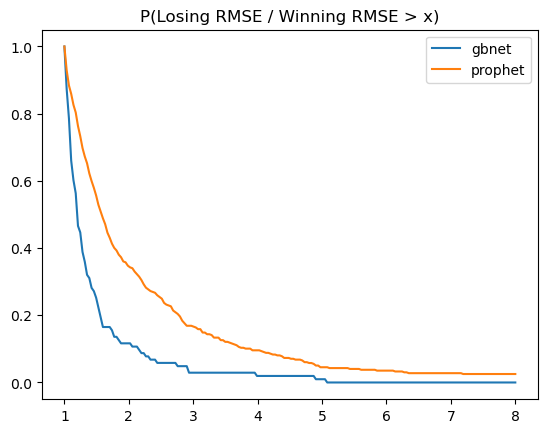

In [5]:
import numpy as np
icdf_grid = np.linspace(0.999, 8, 200)
gbnet_icdf = []
prophet_icdf = []
for c in icdf_grid:
    gbnet_icdf.append((rrr[~rrr['gbnet_wins']]['gbnet_over_prophet'] > c).mean())
    prophet_icdf.append((rrr[rrr['gbnet_wins']]['prophet_over_gbnet'] > c).mean())

plt.plot(icdf_grid, gbnet_icdf, label='gbnet')
plt.plot(icdf_grid, prophet_icdf, label='prophet')
plt.legend()
plt.title('P(Losing RMSE / Winning RMSE > x)')


In [6]:
from scipy.stats import ks_2samp, ttest_ind
print(ks_2samp(
    rrr[~rrr['gbnet_wins']]['gbnet_over_prophet'],
    rrr[rrr['gbnet_wins']]['prophet_over_gbnet'],
))

print(ttest_ind(
    rrr[~rrr['gbnet_wins']]['gbnet_over_prophet'],
    rrr[rrr['gbnet_wins']]['prophet_over_gbnet'],
))

KstestResult(statistic=0.33704238096402633, pvalue=9.116576530316228e-09, statistic_location=1.3469971795514595, statistic_sign=1)
TtestResult(statistic=-3.786202618803983, pvalue=0.0001716262977805401, df=498.0)


In [7]:
# Look at specific example and smoothness

dataset = datasets.iloc[2]
print(dataset['name'])

df = dataset['data'].copy()
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df[dataset['ycol']].copy()

train_cutoff = df['ds'].quantile(0.4)
test_cutoff = df[df['ds'] > train_cutoff]['ds'].quantile(0.2)

train = df[(df['ds'] <= train_cutoff) & (df['y'].notnull())].reset_index(drop=True).copy()
test = df[(df['ds'] > train_cutoff) & (df['ds'] <= test_cutoff) & (df['y'].notnull())].reset_index(drop=True).copy()

m = Forecast()
m.fit(train, train['y'])
test['gbnet_pred'] = m.predict(test)

pm = Prophet()
pm.fit(train)
prophet_breakdown = pm.predict(test)
test['prophet_pred'] = prophet_breakdown['yhat']

19:47:28 - cmdstanpy - INFO - Chain [1] start processing
19:47:28 - cmdstanpy - INFO - Chain [1] done processing


example_pedestrians_multivariate.csv


In [8]:
sel = test['y'].notnull()
{
    'name': dataset['name'],
    'rmse_gbnet': root_mean_squared_error(test[sel]['y'], test[sel]['gbnet_pred']),
    'rmse_prophet': root_mean_squared_error(test[sel]['y'], test[sel]['prophet_pred'])
}

{'name': 'example_pedestrians_multivariate.csv',
 'rmse_gbnet': 432.68842685091283,
 'rmse_prophet': 766.2802401759562}

Text(0.5, 1.0, 'example_pedestrians_multivariate.csv')

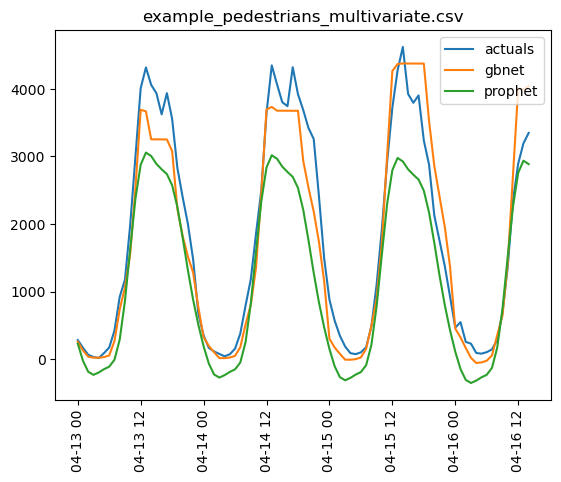

In [9]:
plt.plot(test['ds'], test['y'], label='actuals')
plt.plot(test['ds'], test['gbnet_pred'], label='gbnet')
plt.plot(test['ds'], test['prophet_pred'], label='prophet')

_ = plt.xticks(rotation=90)
plt.legend()
plt.title(f"{dataset['name']}")